# TODO

- [ ] Predict slice 118 after clipping the max value.
- [ ] Predict slice 215 after clipping the max value.
- [ ] Predict slice 235 after clipping the max value and compare with 234.
- [ ] Predict slice 321 after clipping the max value and compare with 320.
- [ ] Predict slice 351 after clipping the max value and compare with 320.
- [ ] Predict slice 734 after clipping the max value and compare with 735.
- [ ] "Easy" Mistakes present in 128 are absent in 219.
- [ ] Why the probabilities of 244 look so different with 243. 
- [ ] Compare 271 with 272.
- [ ] In comparing 274 to 276, it appears the model identifies connected holes as a vessel, but not when they are separate.
- [ ] Compare 300 with 301. Why is the prediction so different with the center vessel.
- [ ] Compare 429 with 430. There is an artifact in the top left and also a vessel predicition is not filled in one but it is in the other.
- [ ] From 734 to 750 there a really bright spot in the middle that messes up the prediction.
- [ ] From 1028 to 1100 there is a white dot on the bottom of the image that completely messes up the predictions.
- [ ] 1847 and a few onward have a vessel prediction in the top right corner. Pay attention to the white lines that close on the border of the image as the model thinks this are vessels.
- [ ] 1911 there is a black dot. The model thinks it is a vessel.

In [26]:
import torch
import cv2
from torchvision.utils import draw_segmentation_masks
from torchvision.transforms.functional import to_pil_image
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [27]:
input_dir = "/home/david/ml-projects/blood-vessel-segmentation/other/"
train_dir = input_dir + "data/train/"
imgs_dir = f"{train_dir}kidney_1_dense/images/"
msks_dir = f"{train_dir}kidney_1_dense/labels/"
preds_dir = input_dir + "kidney_1_dense_preds/"
slices_ids = sorted(os.listdir(imgs_dir))

In [28]:
toggle = [1, 0, 0, 1]
idxs = [1856]

for idx in idxs:
    img = torch.from_numpy(cv2.imread(imgs_dir + slices_ids[idx], cv2.IMREAD_GRAYSCALE)).broadcast_to((3, 1303, 912))
    msk = torch.from_numpy(np.array(Image.open(msks_dir + slices_ids[idx])) // 255)
    probs = np.array(Image.open(preds_dir + slices_ids[idx]), dtype=np.float32)
    probs /= probs.max()
    prd = torch.from_numpy(np.where(probs >= 0.5, 1, 0).astype(np.uint8))

    pred_overlay = to_pil_image(draw_segmentation_masks(img, masks=prd.bool(), alpha=1.0, colors=["orange"]))
    mask_overlay = to_pil_image(draw_segmentation_masks(img, masks=msk.bool(), alpha=1.0, colors=["red"]))
    probs_overlay = Image.fromarray((cm.viridis(probs)[:, :, :3] * 225).astype(np.uint8))


    if toggle[0] == 1:
        Image.fromarray(cv2.imread(imgs_dir + slices_ids[idx], cv2.IMREAD_GRAYSCALE)).show()
    if toggle[1] == 1:
        mask_overlay.show()
    if toggle[2] == 1:
        pred_overlay.show()
    if toggle[3] == 1:
        probs_overlay.show()



(eog:43358): EOG-CRITICAL **: 00:43:19.413: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:43358): GLib-GIO-CRITICAL **: 00:43:19.413: g_file_equal: assertion 'G_IS_FILE (file1)' failed

(eog:43358): Atk-CRITICAL **: 00:43:19.894: atk_object_ref_state_set: assertion 'ATK_IS_OBJECT (accessible)' failed

(eog:43358): Gtk-CRITICAL **: 00:43:19.894: gtk_accessible_get_widget: assertion 'GTK_IS_ACCESSIBLE (accessible)' failed


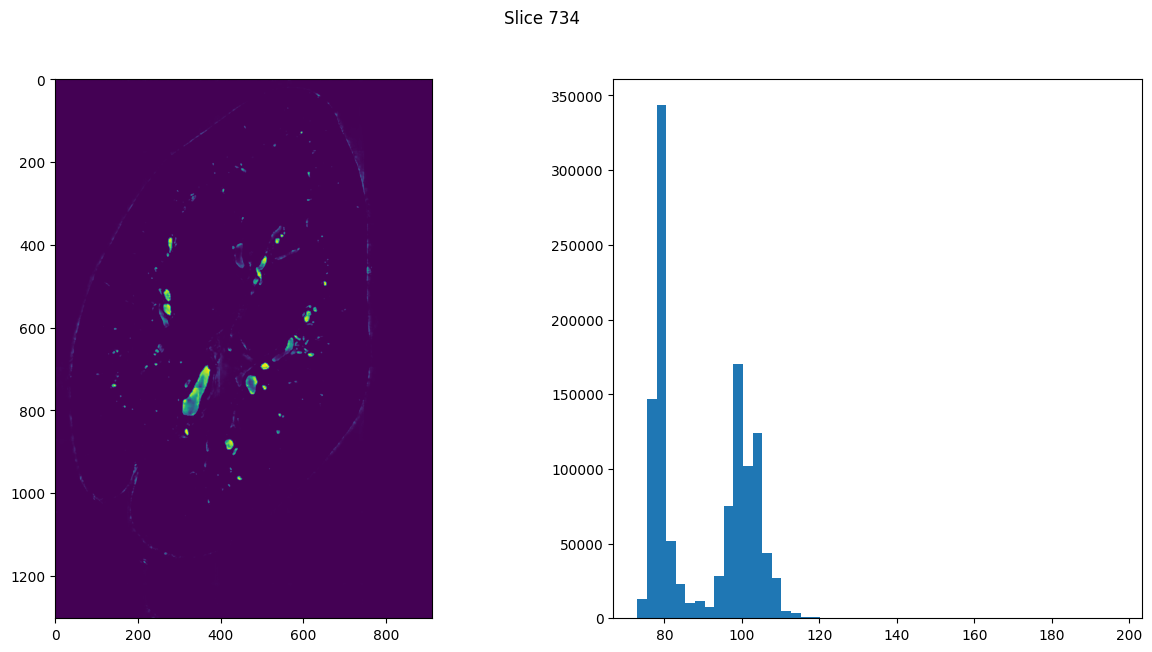

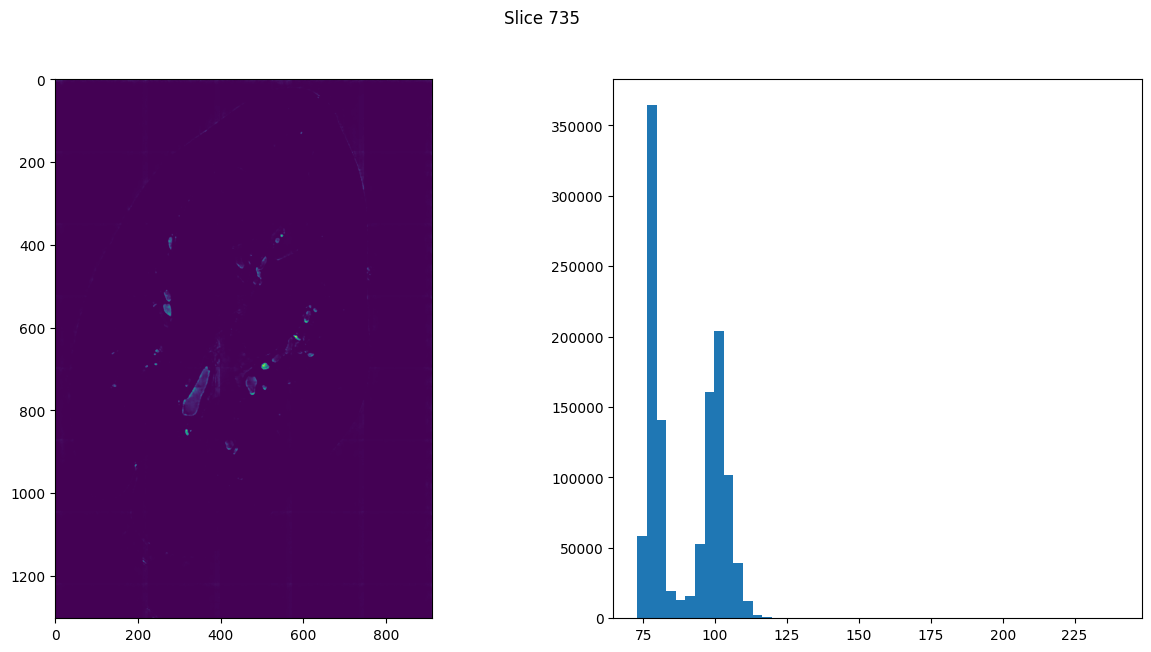

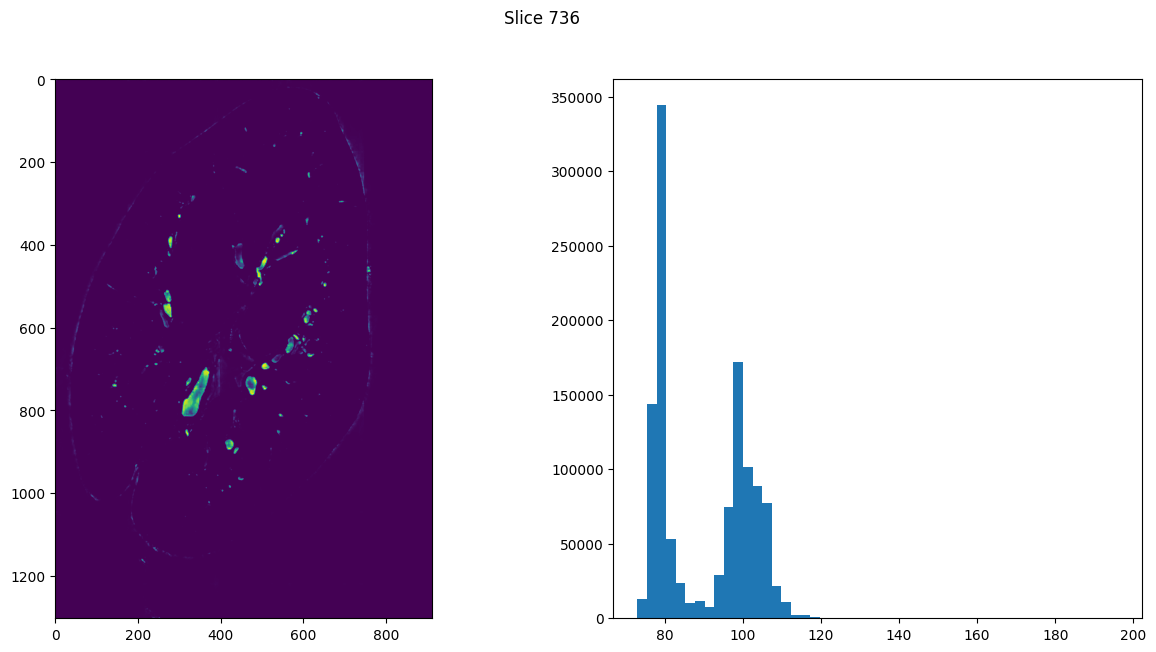

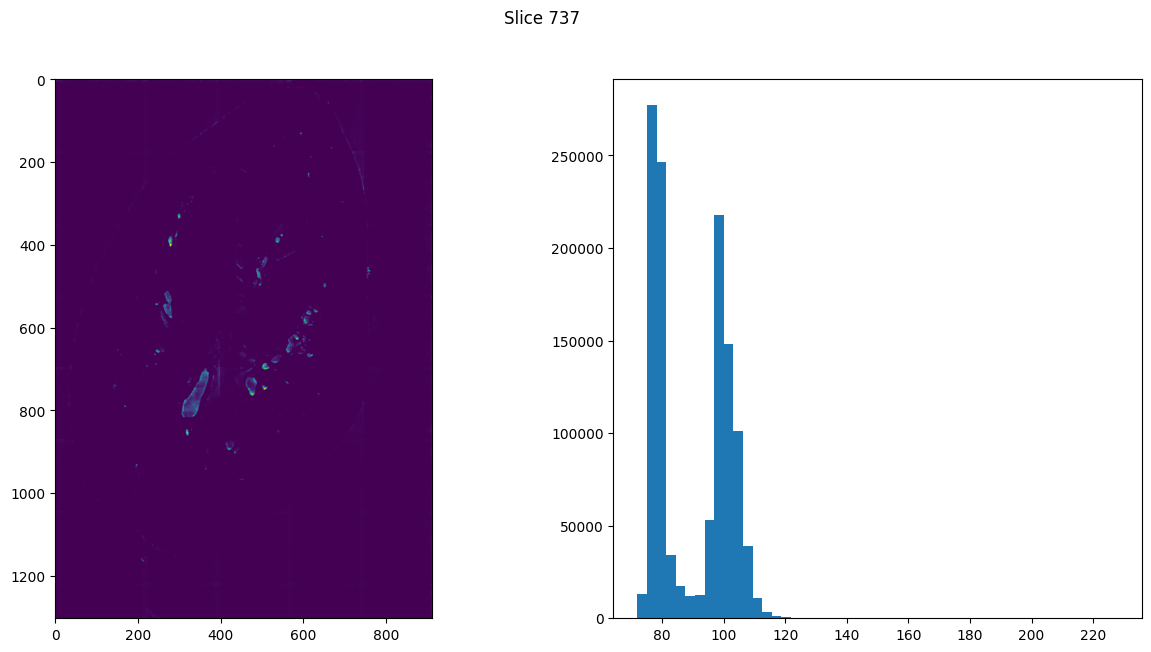

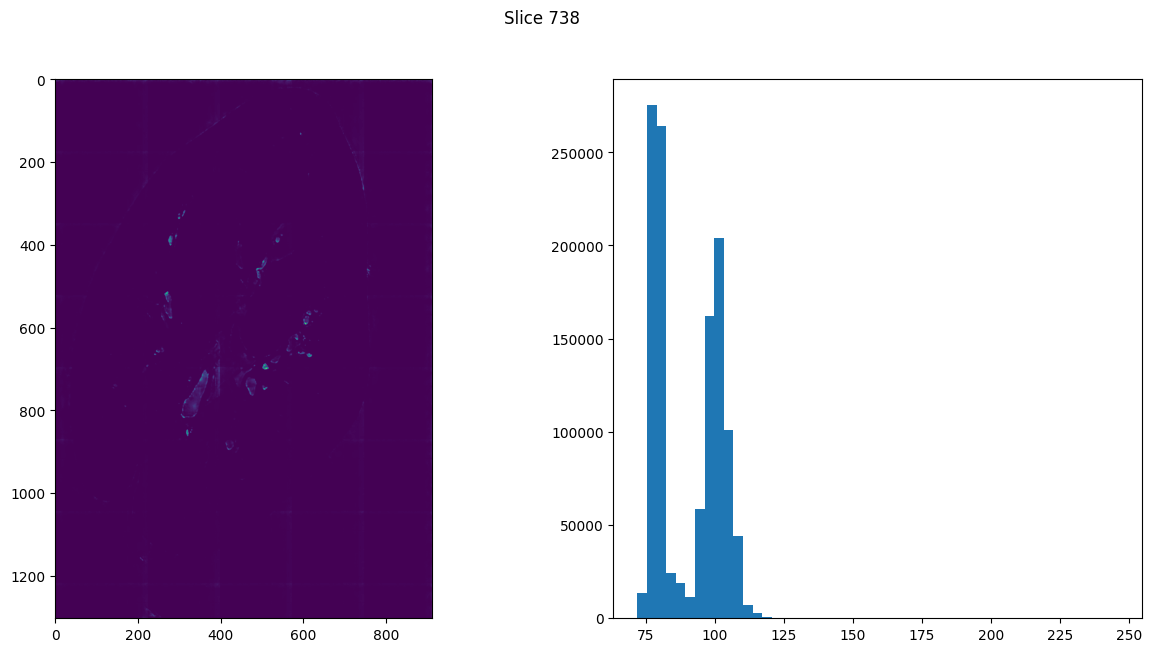

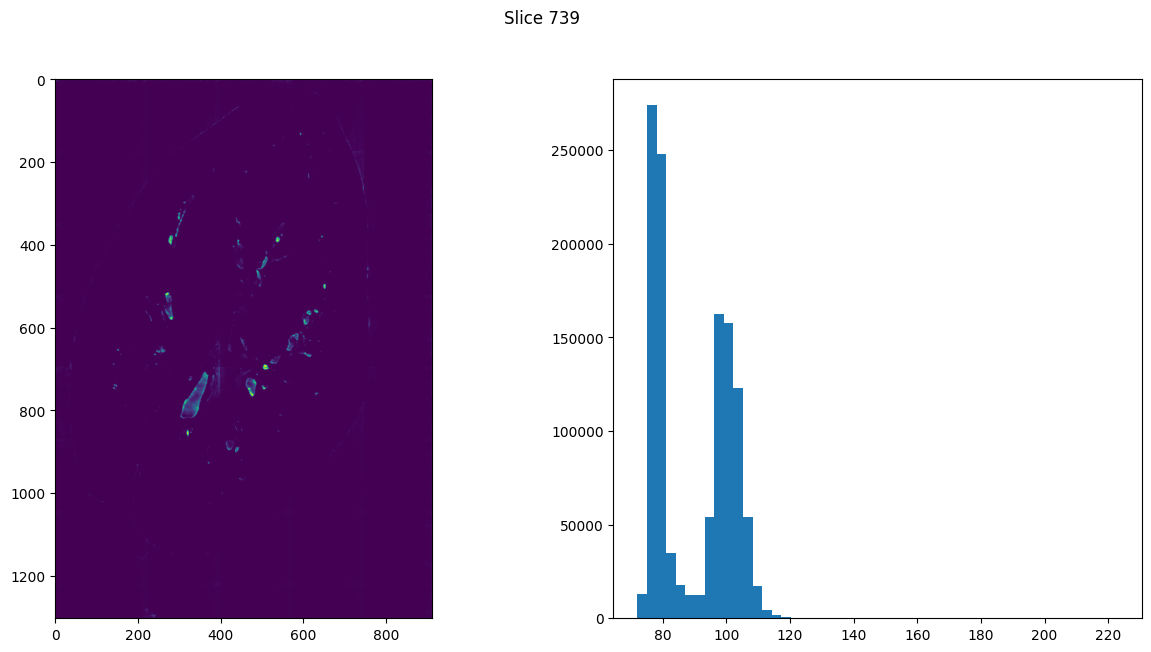

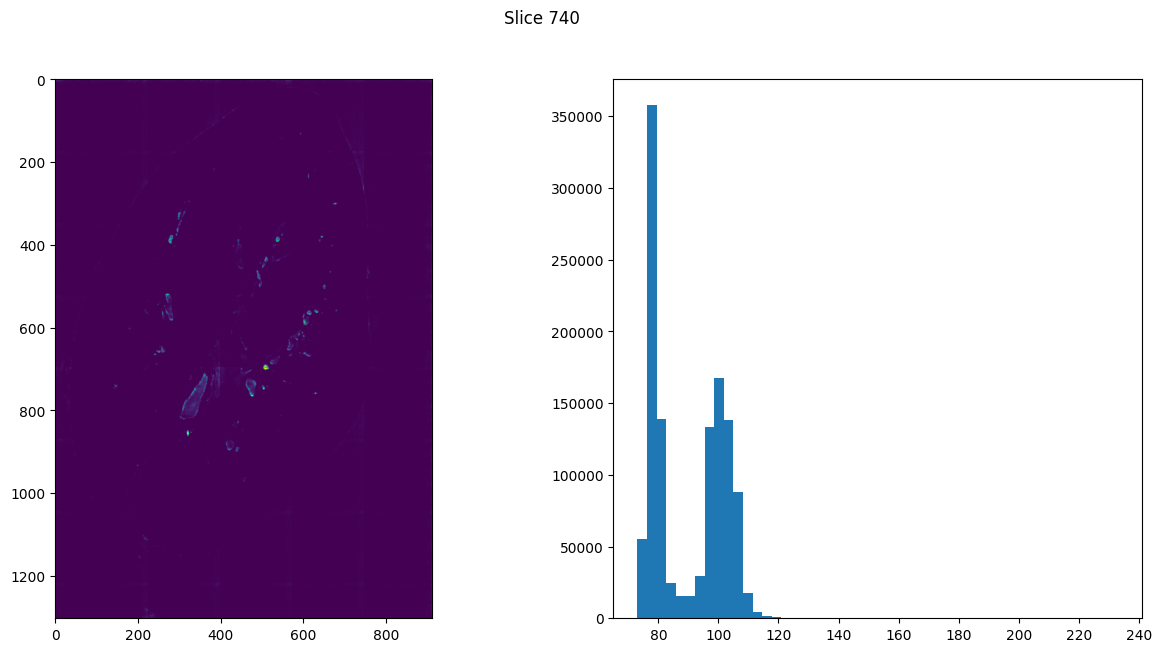

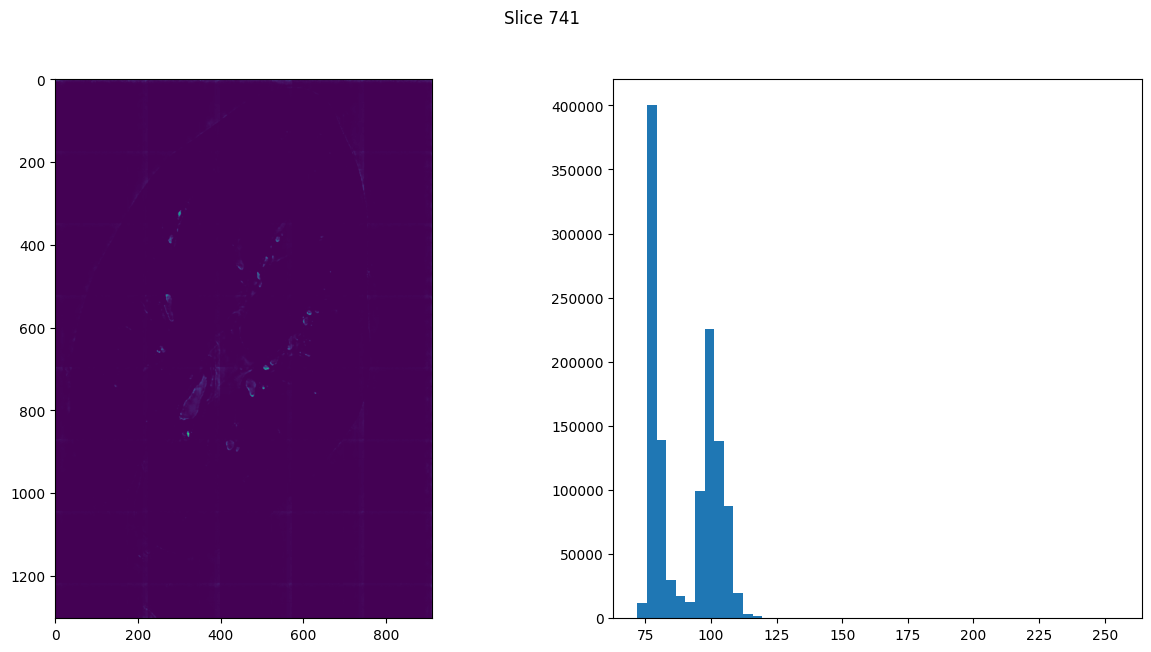

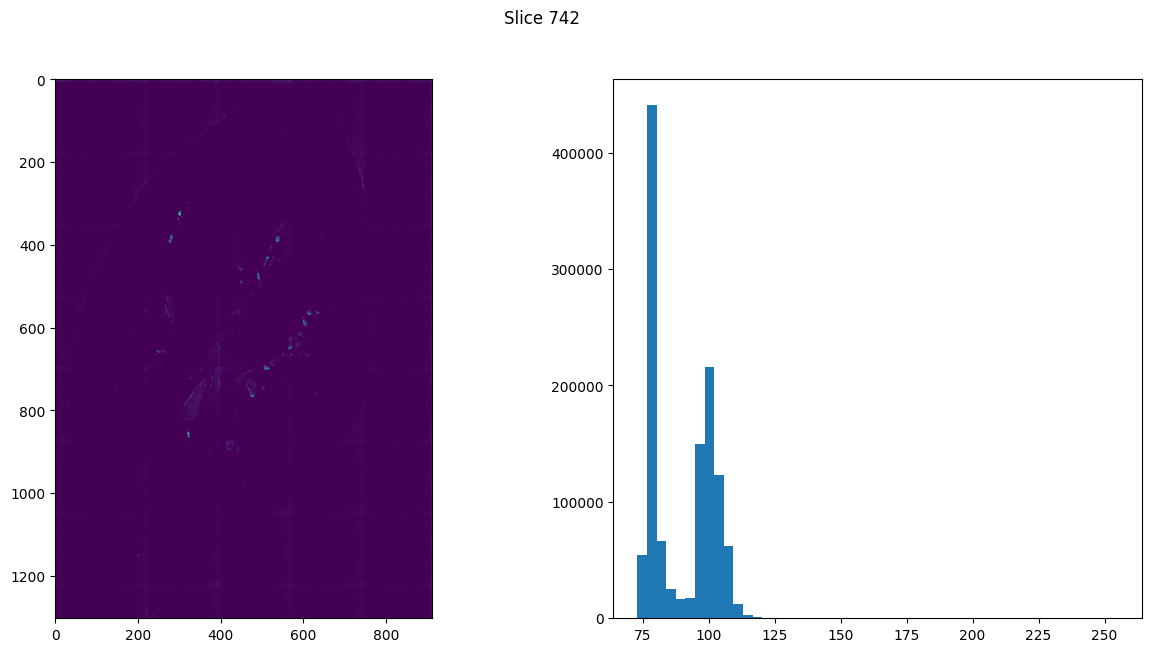

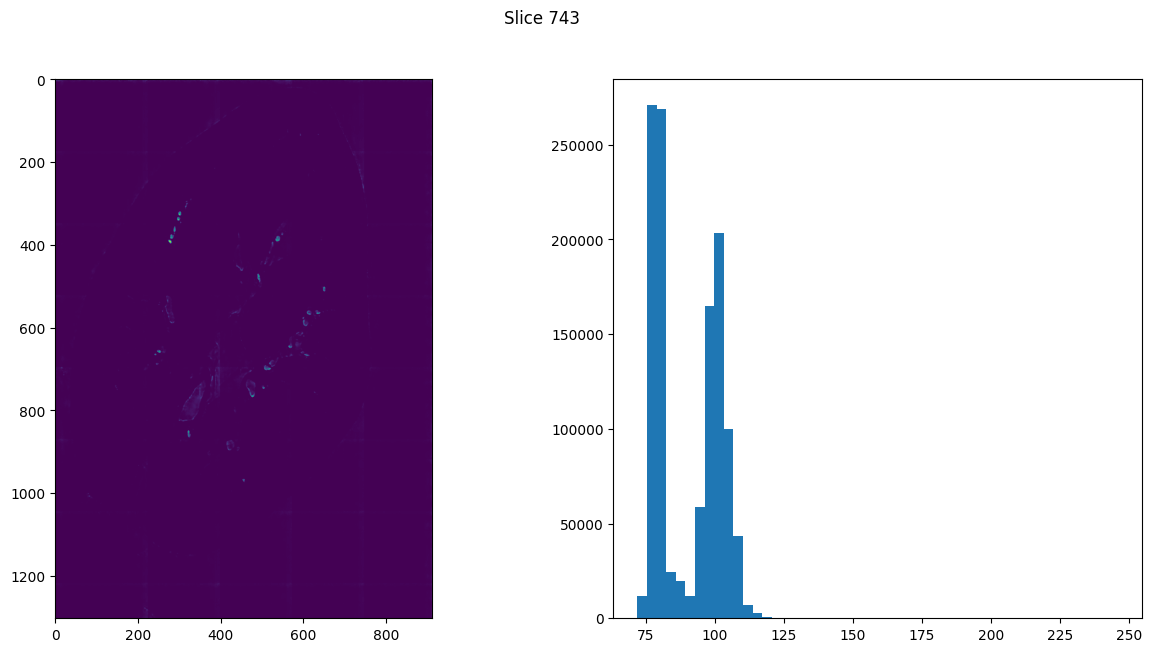

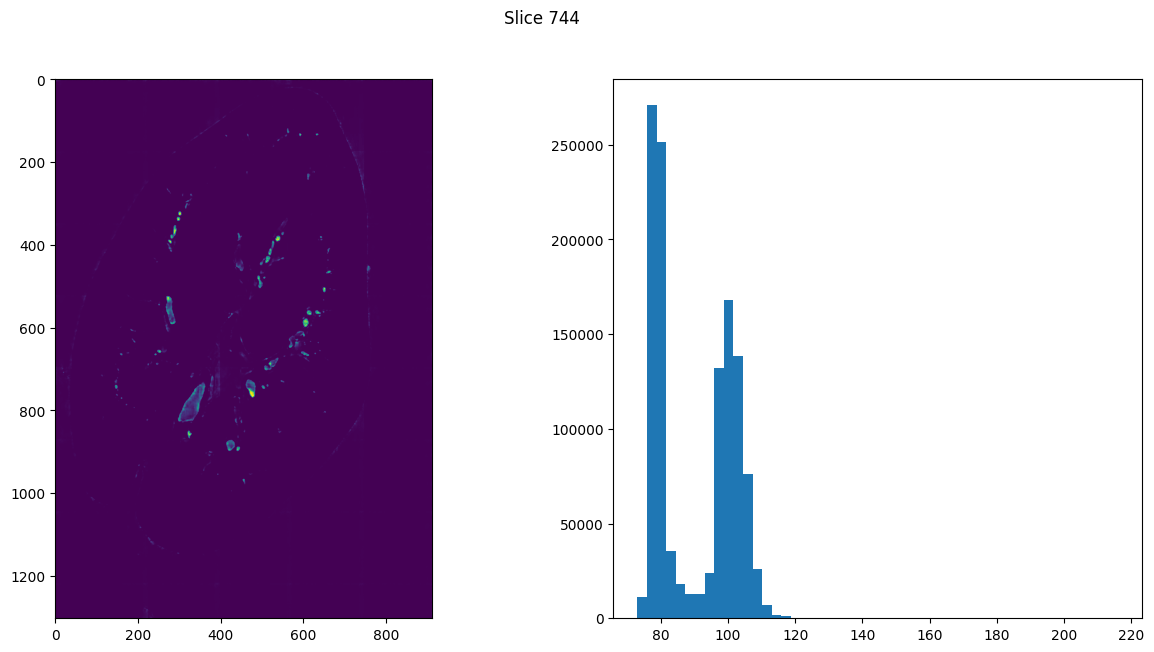

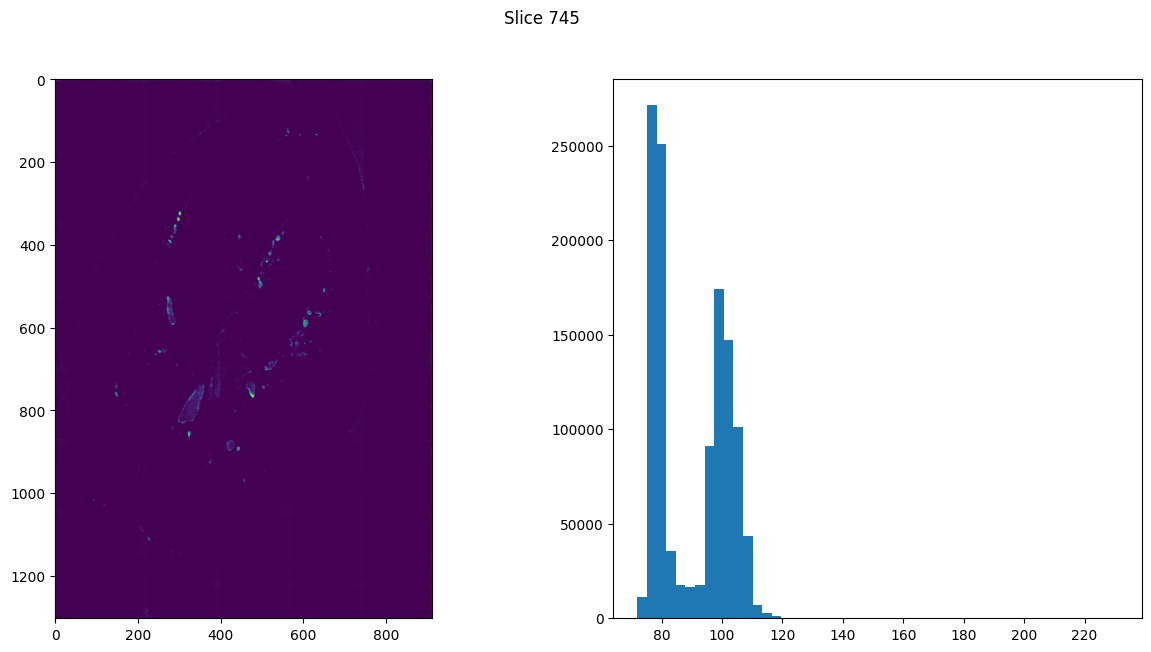

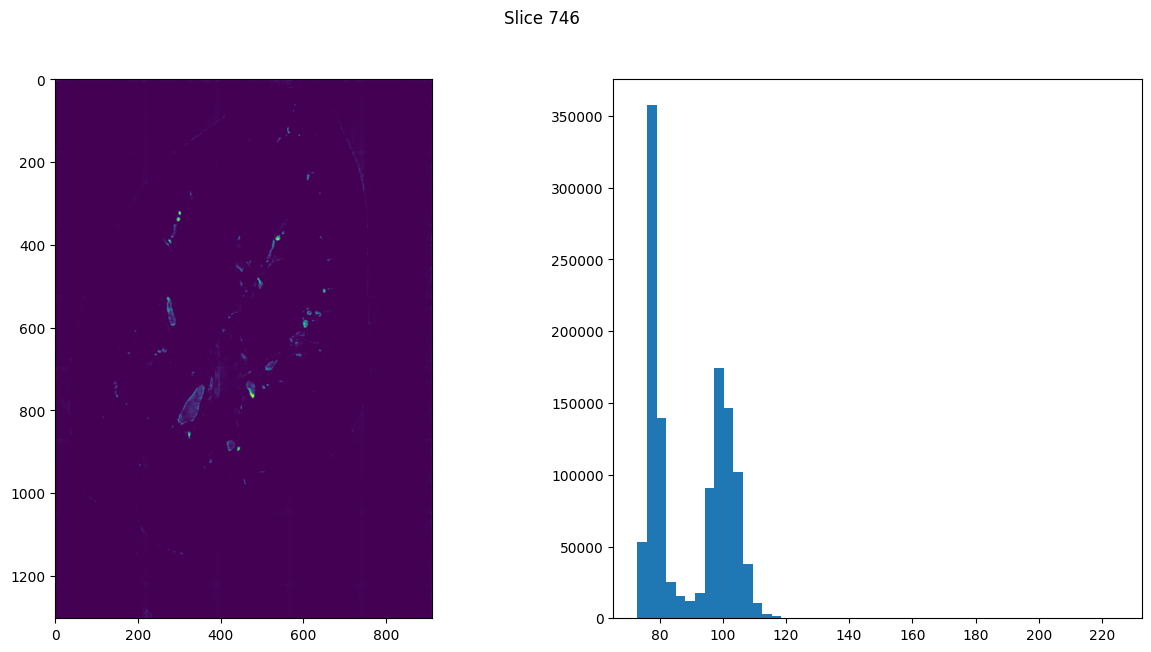

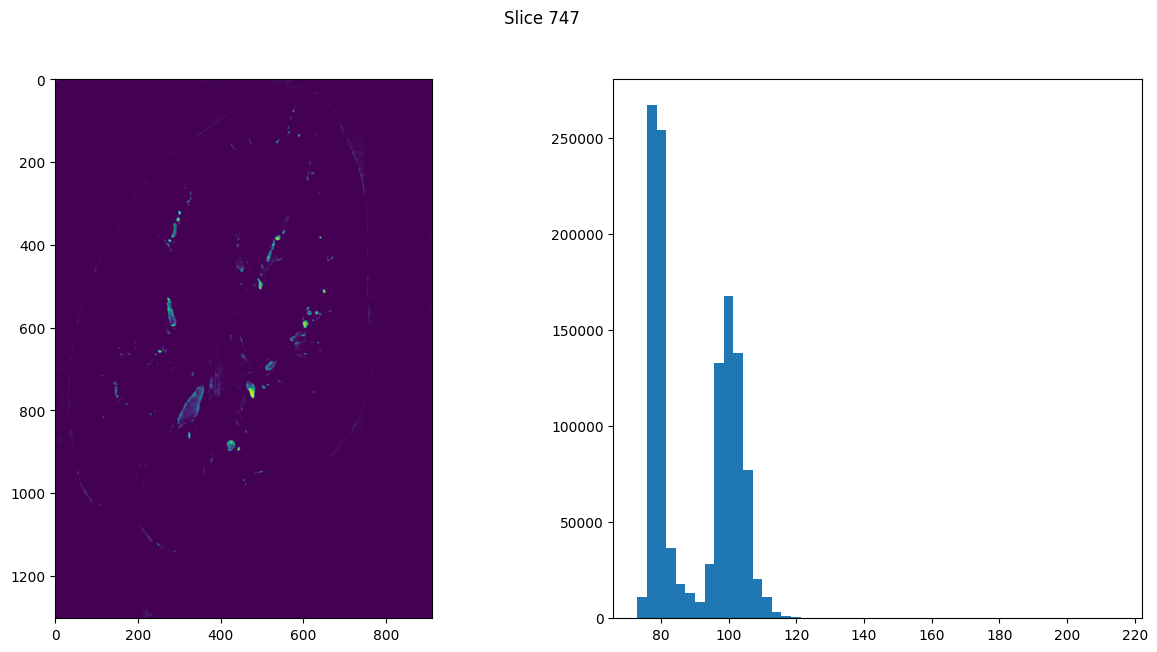

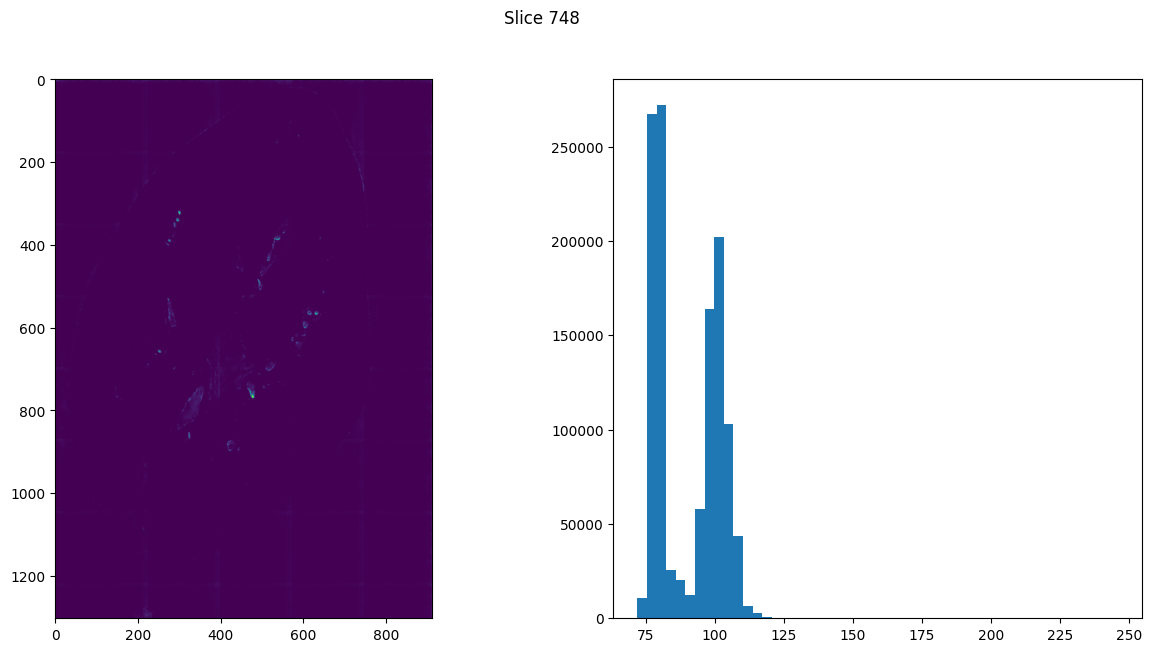

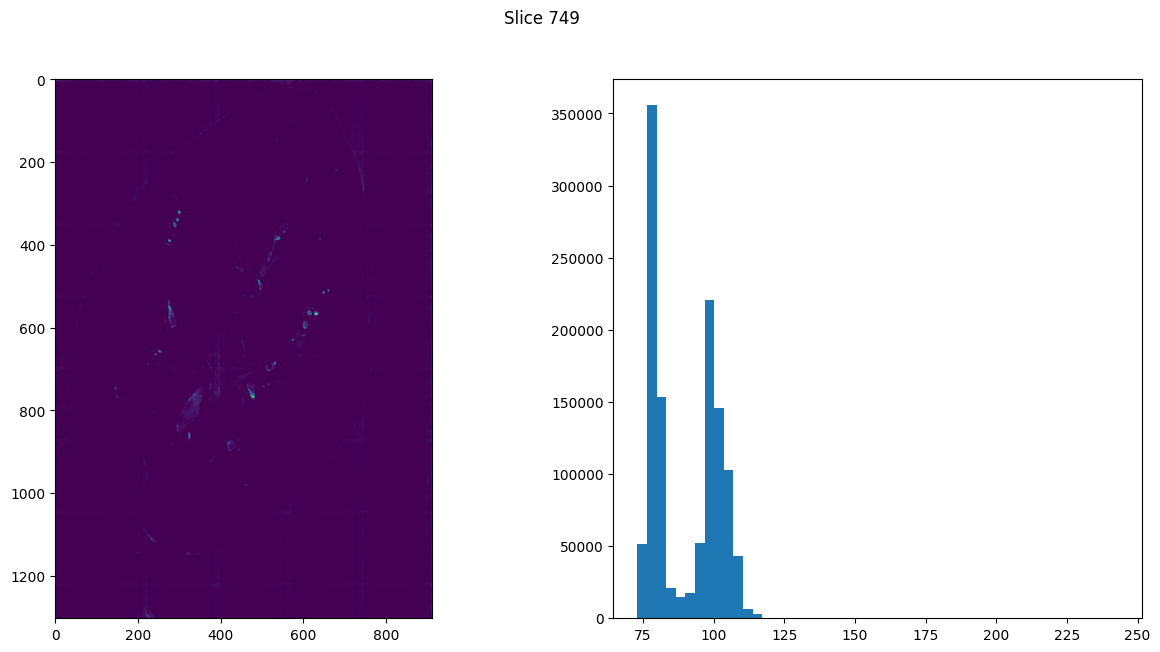

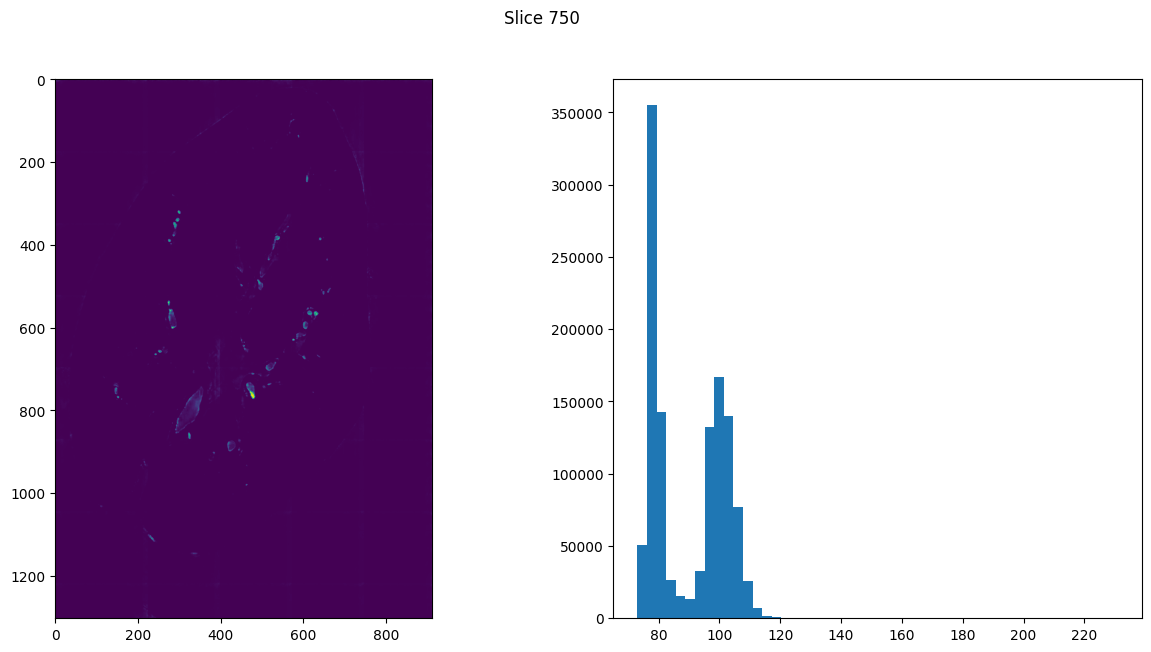

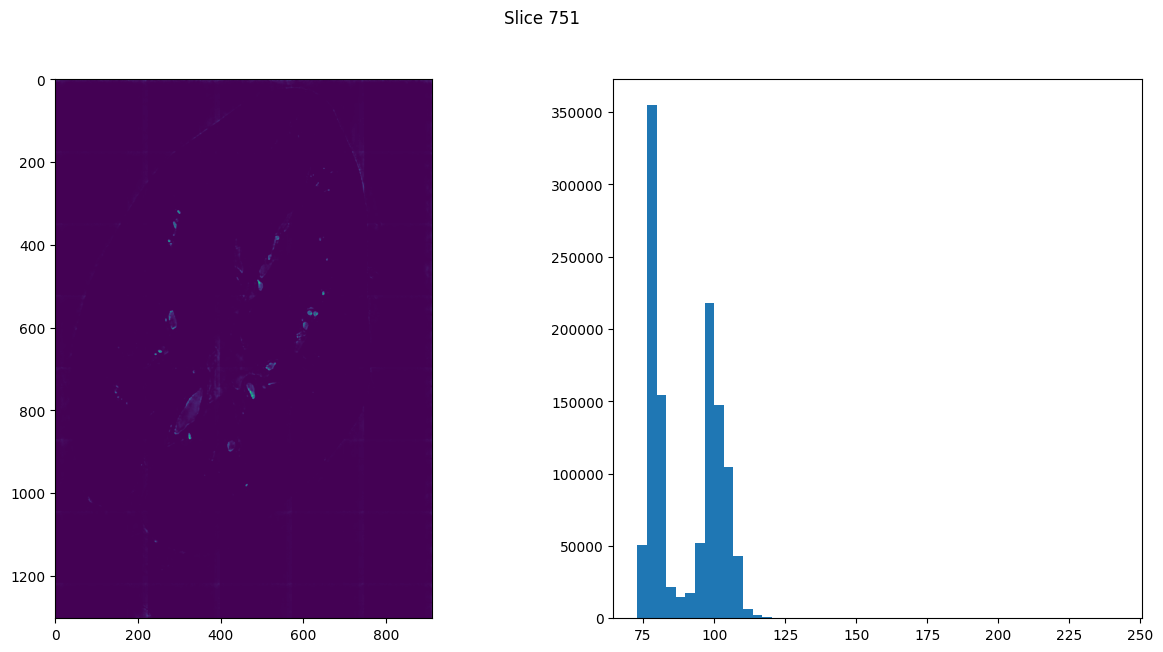

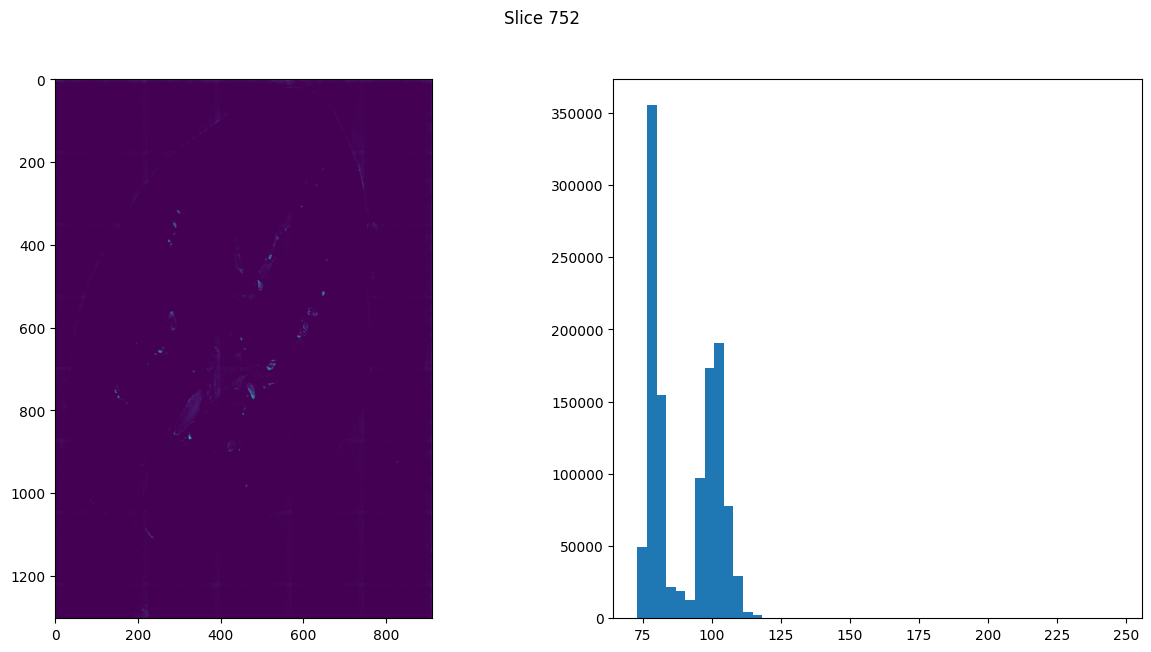

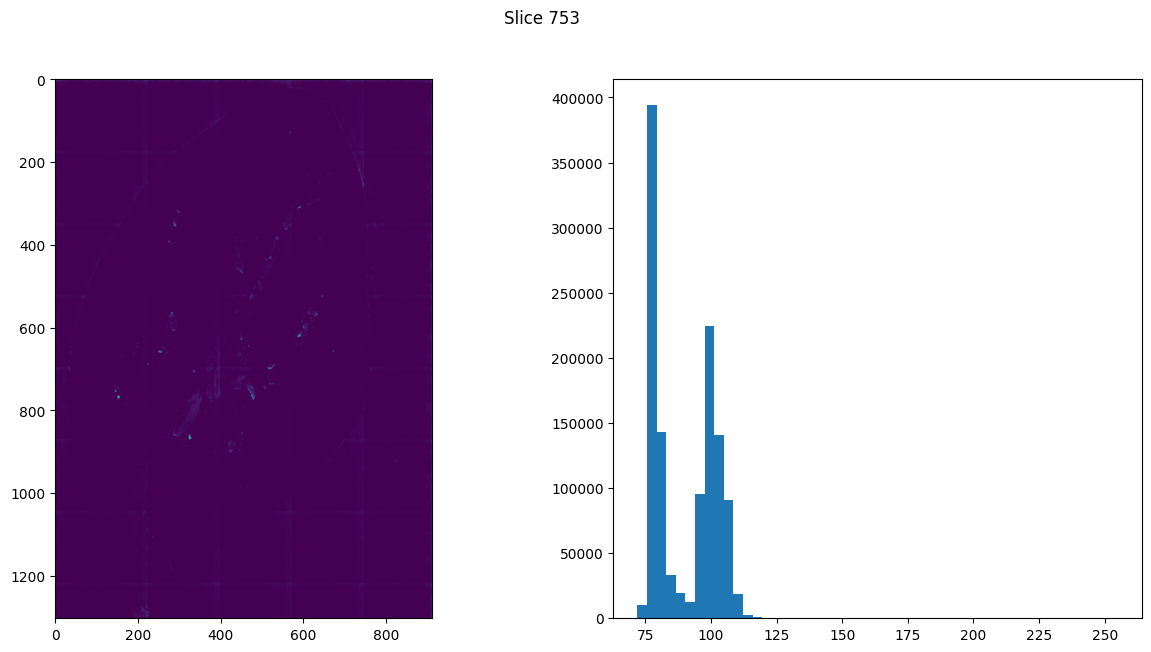

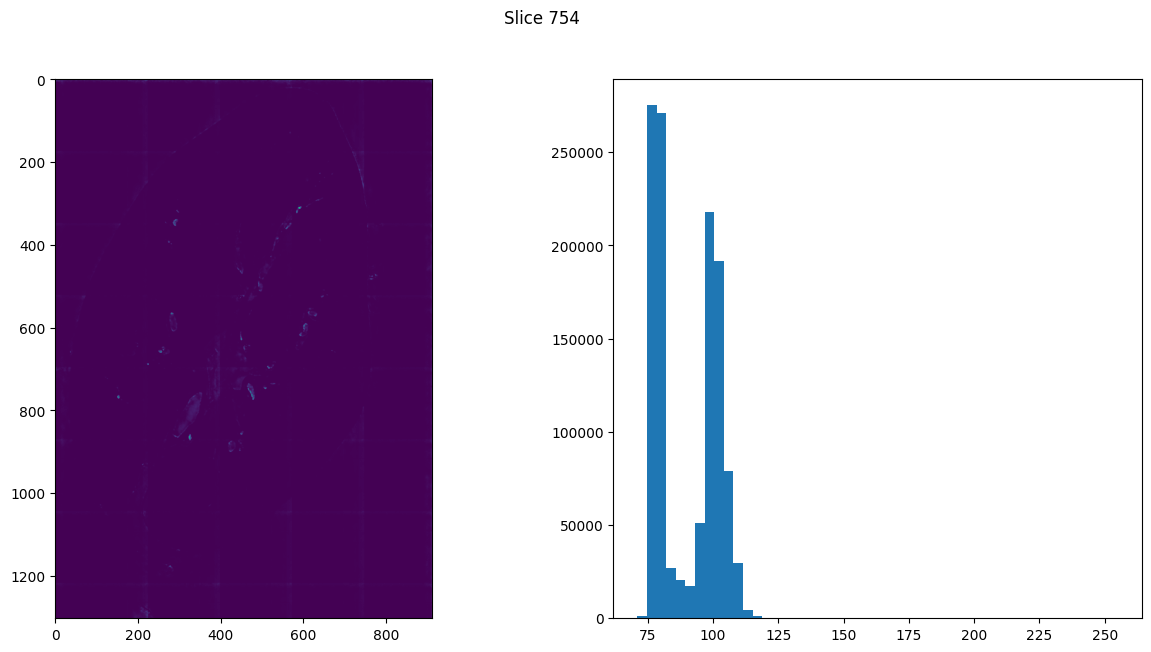

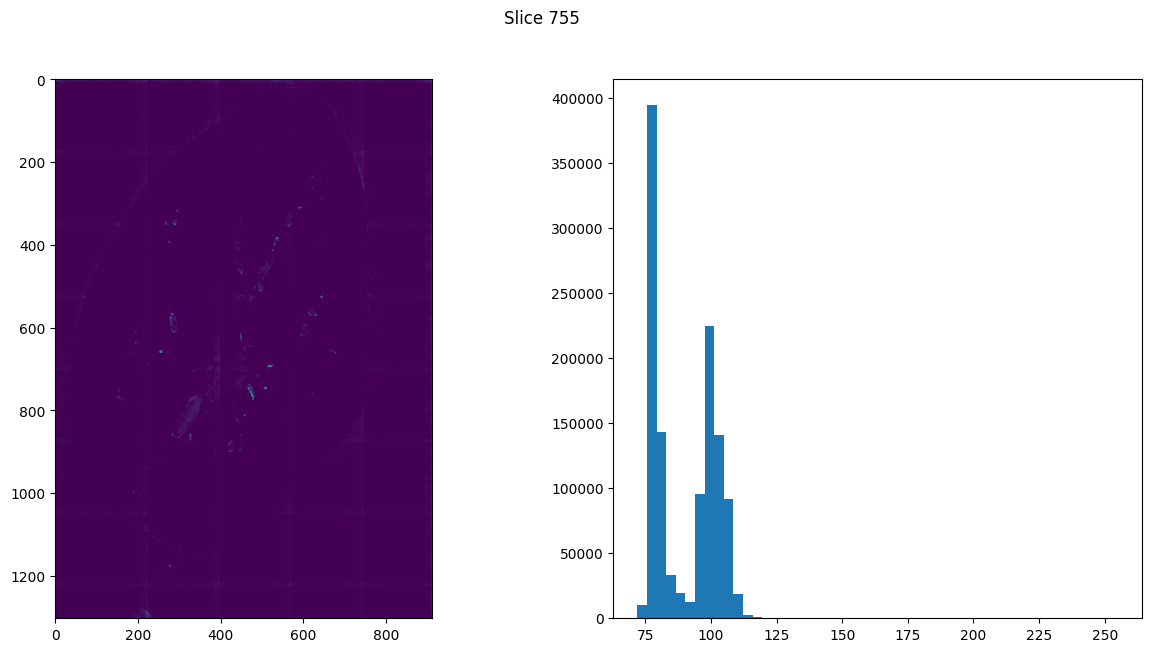

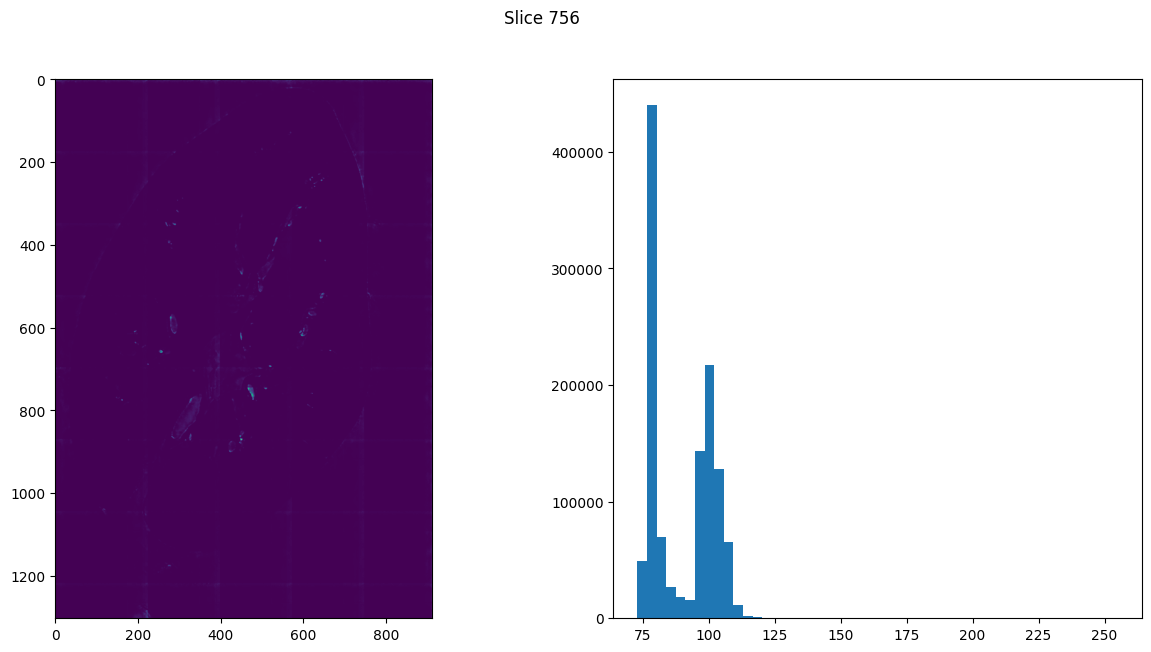

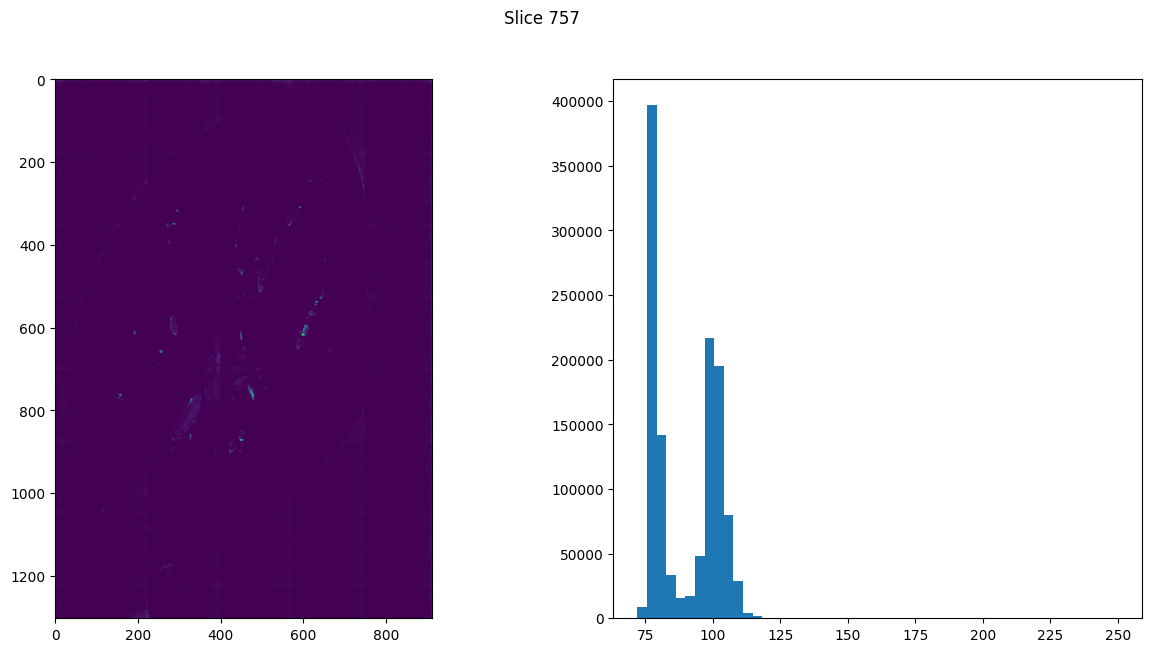

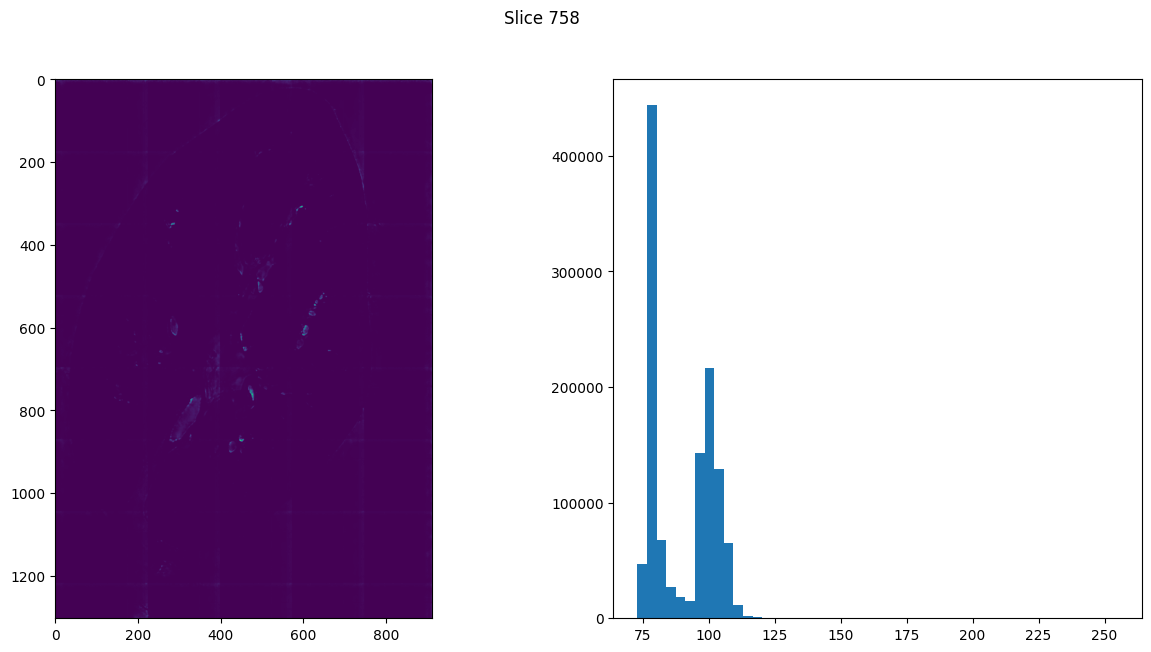

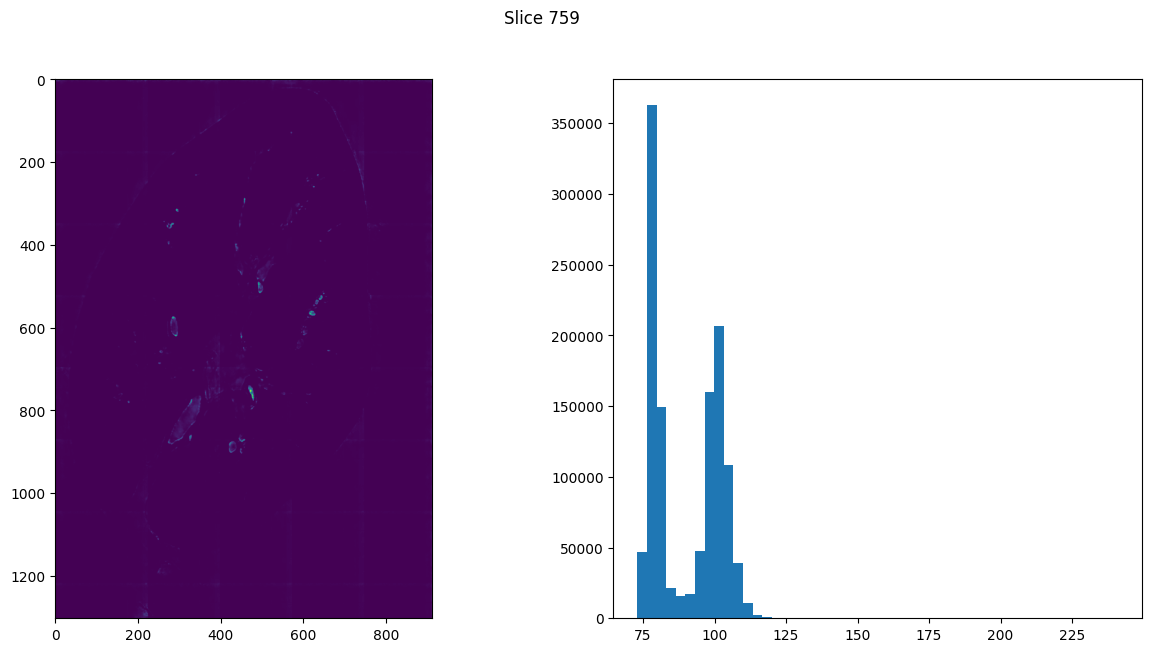

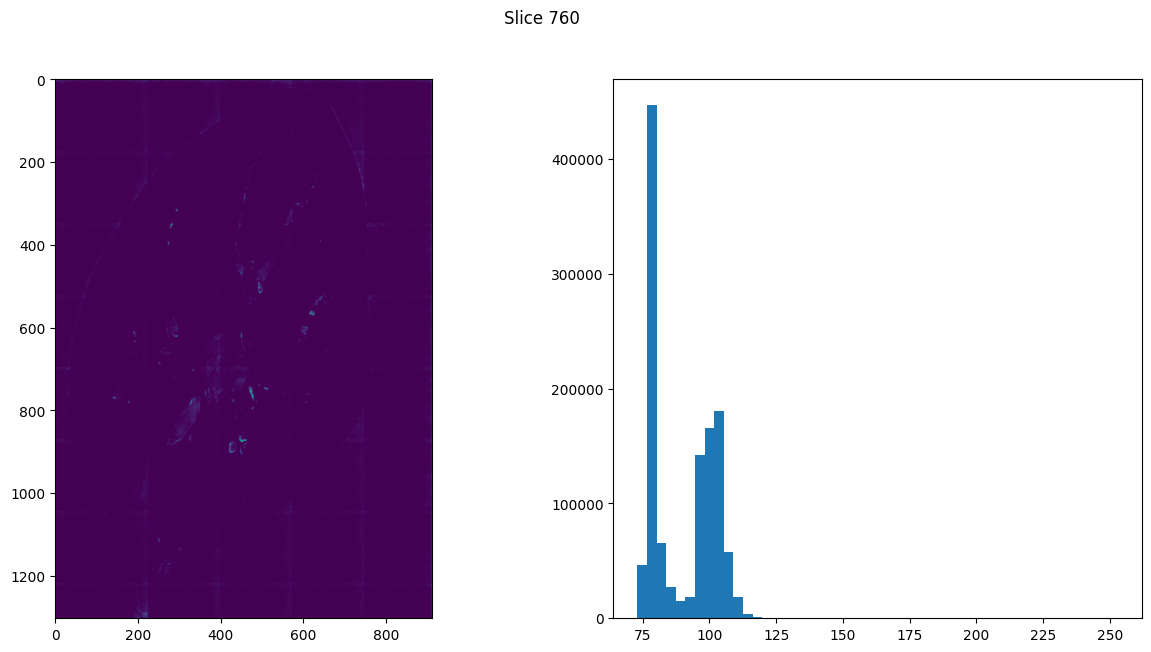

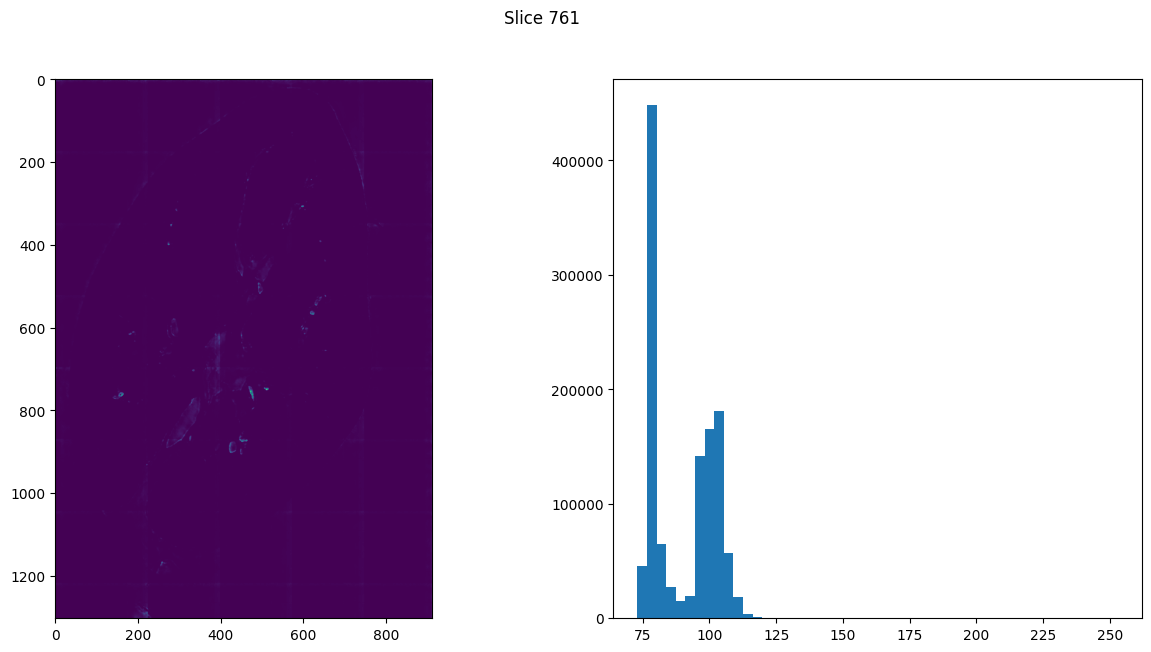

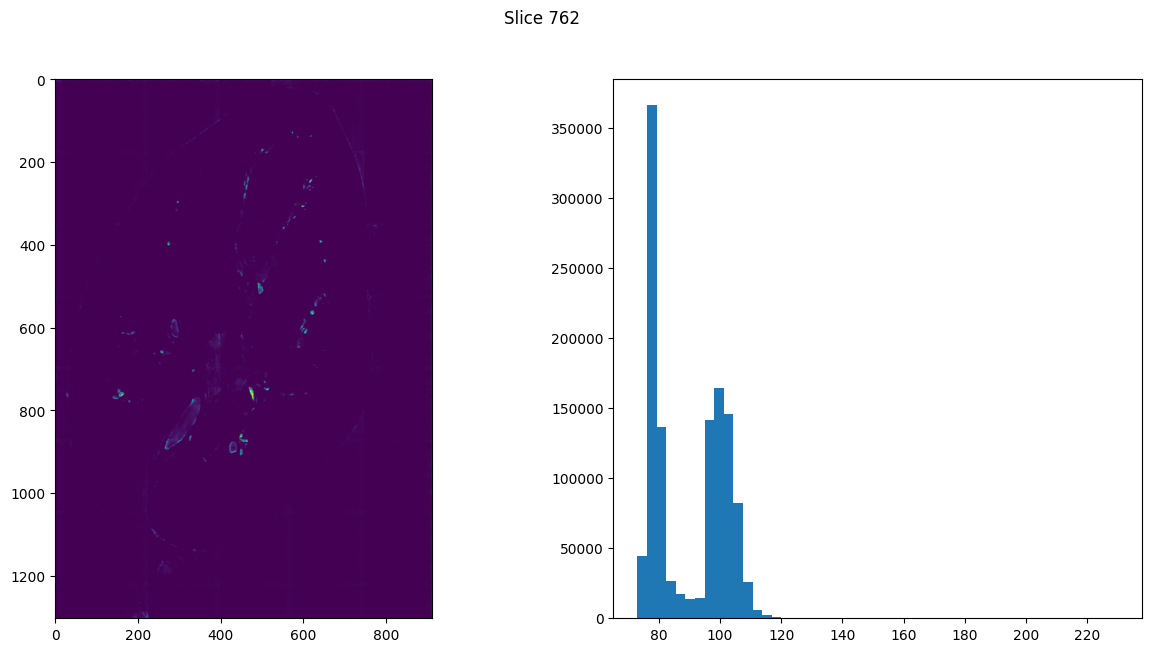

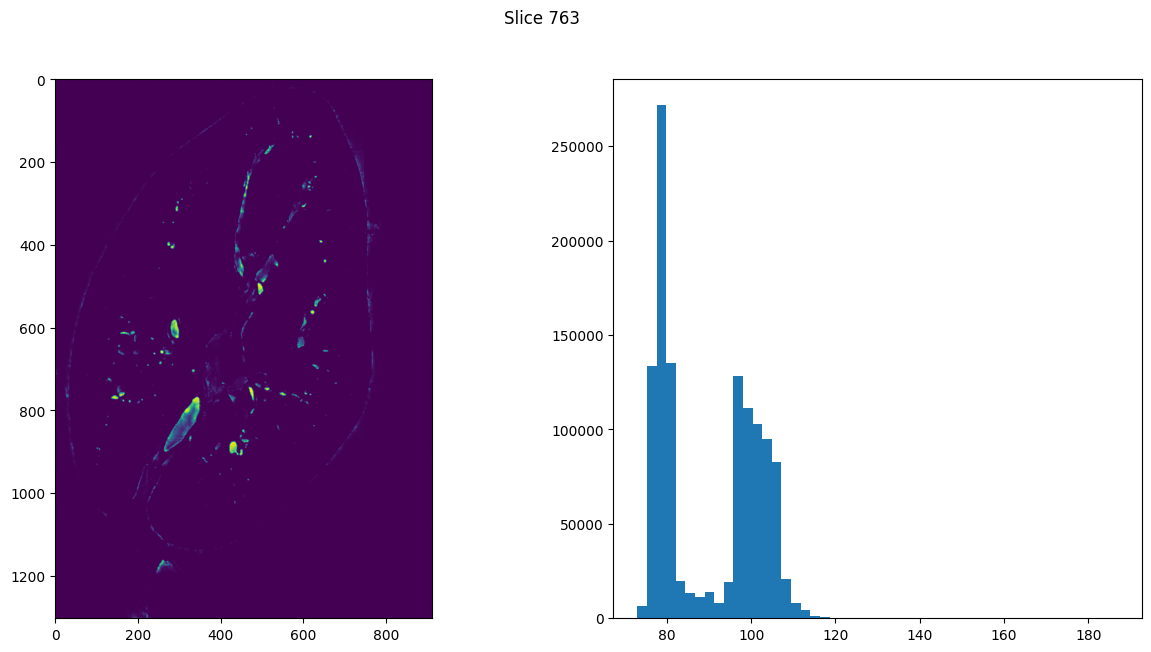

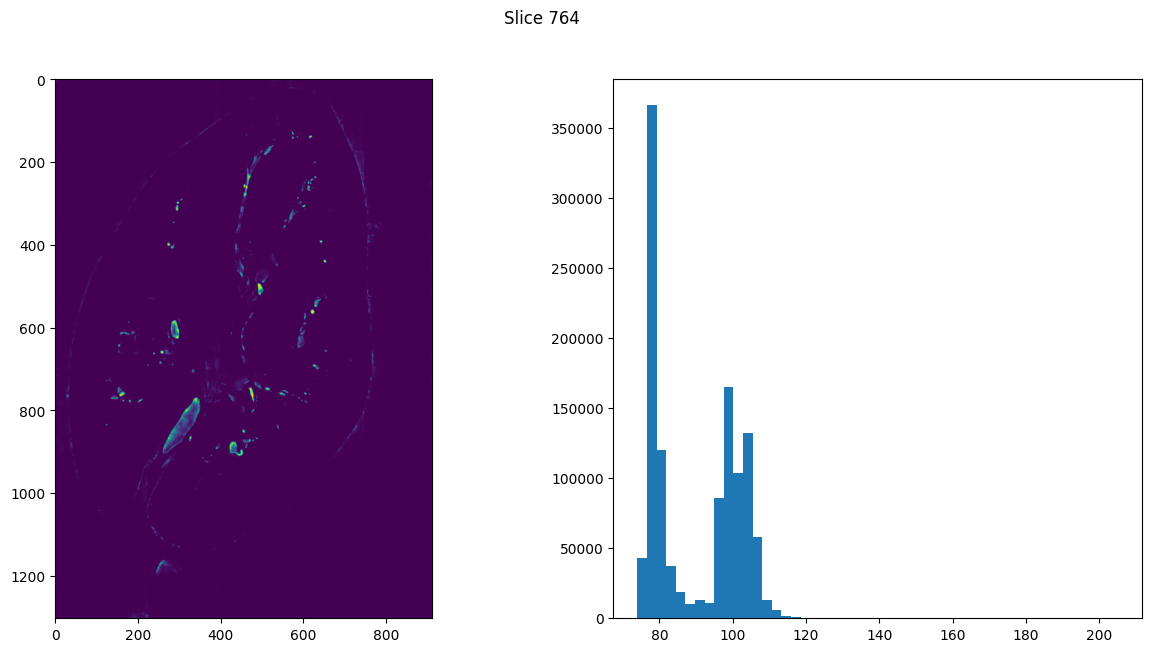

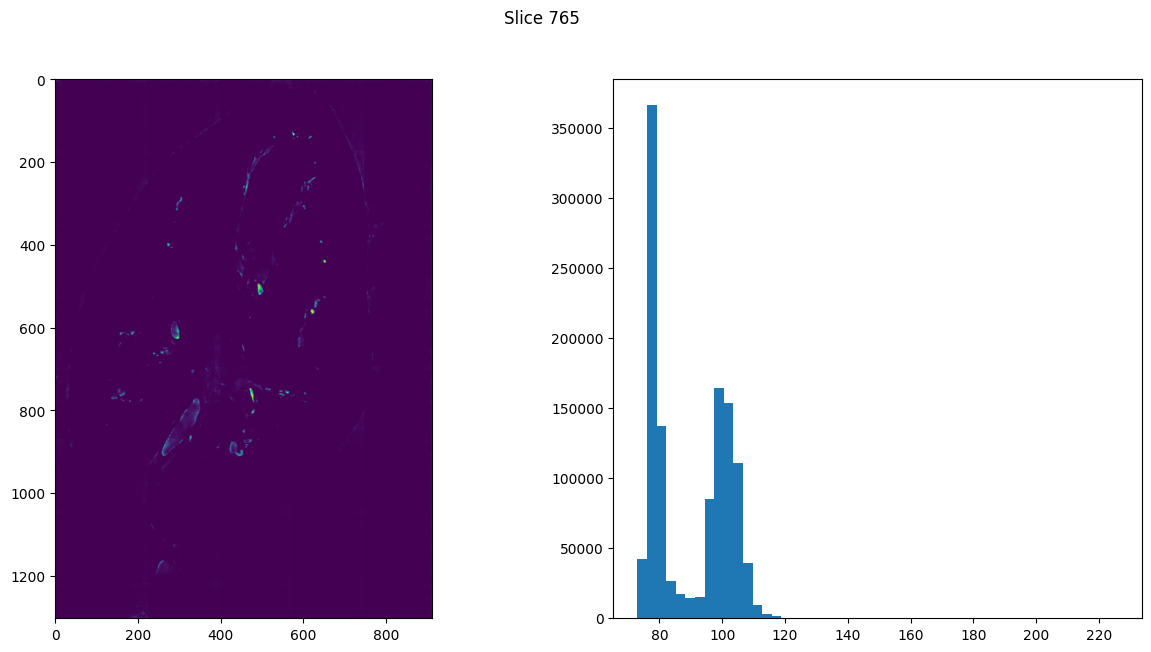

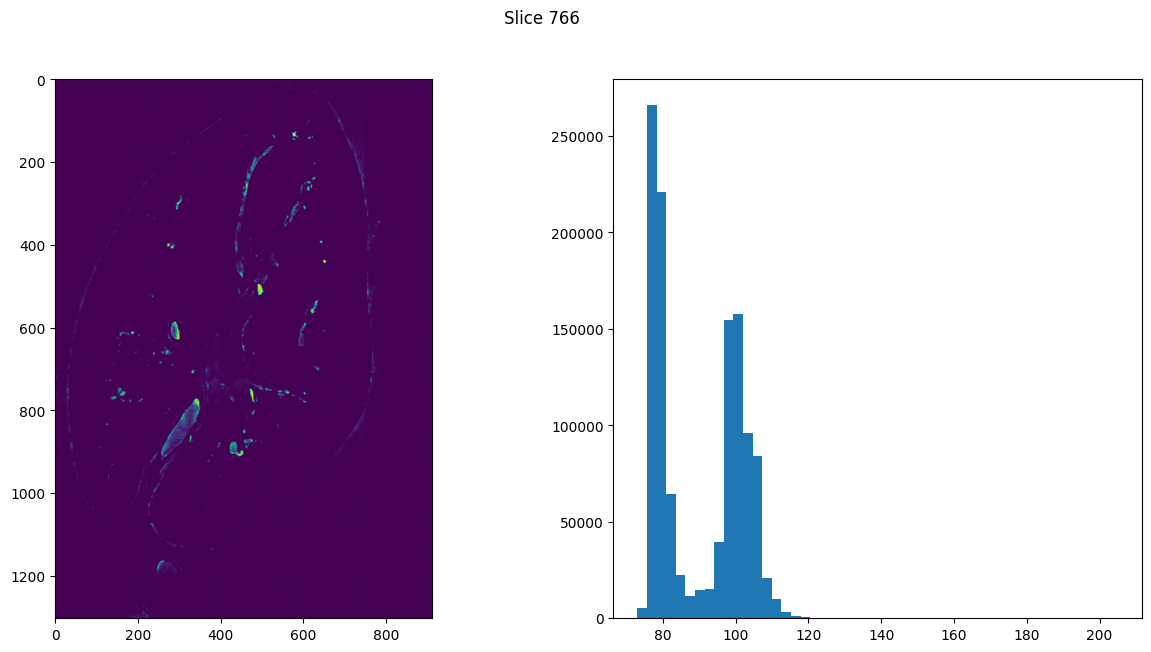

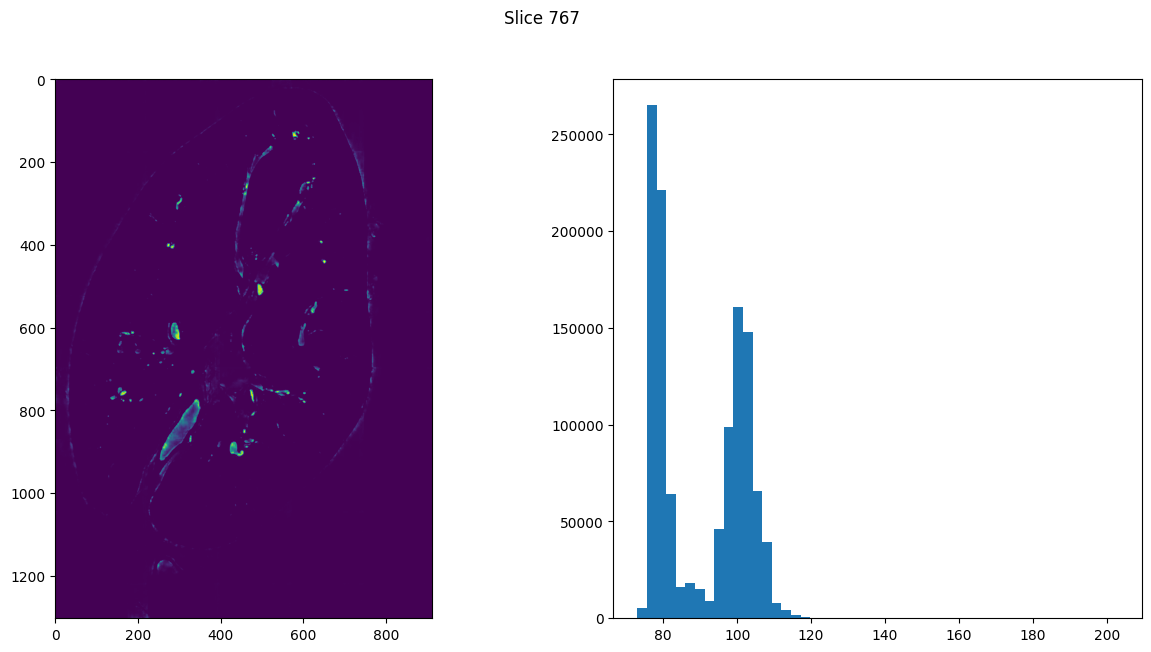

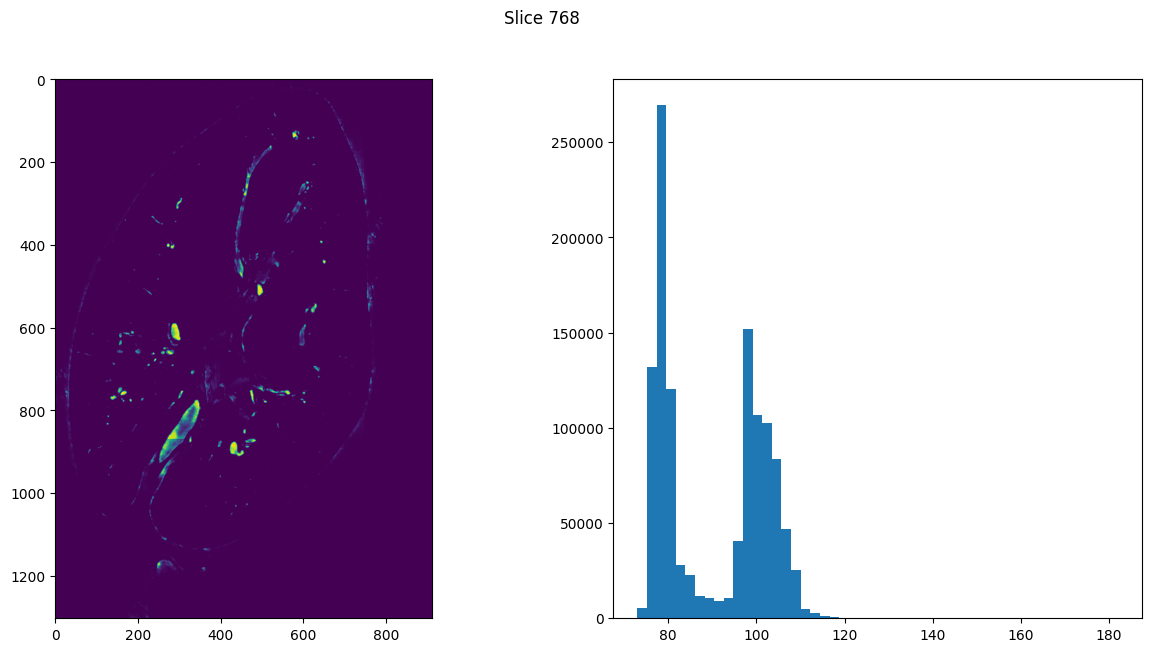

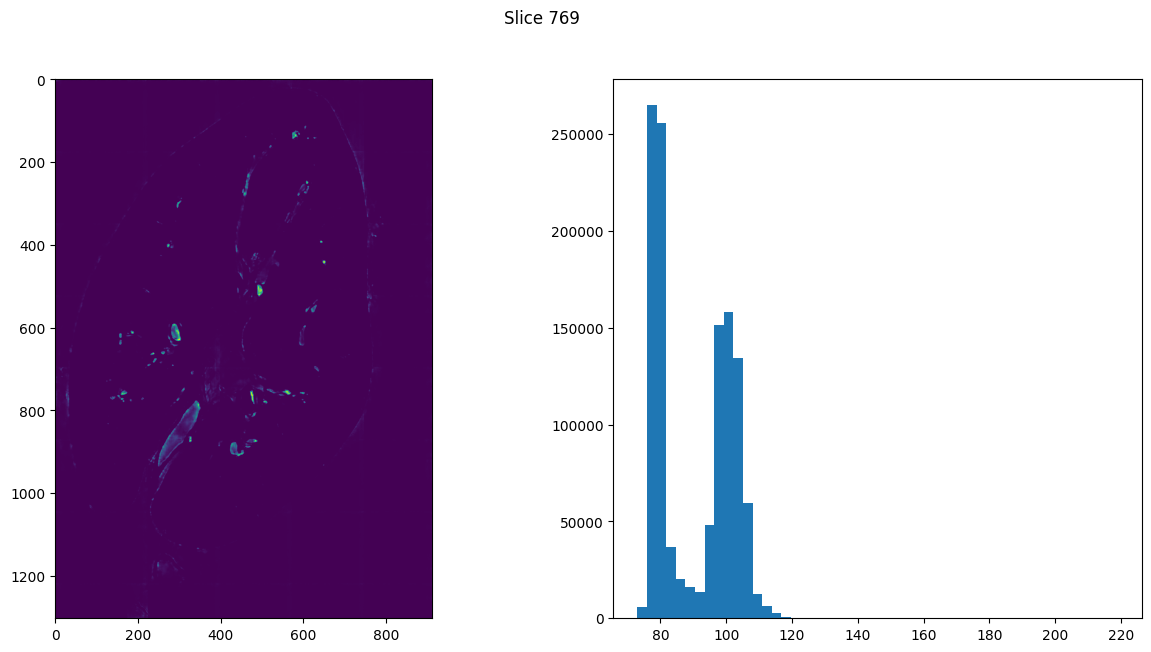

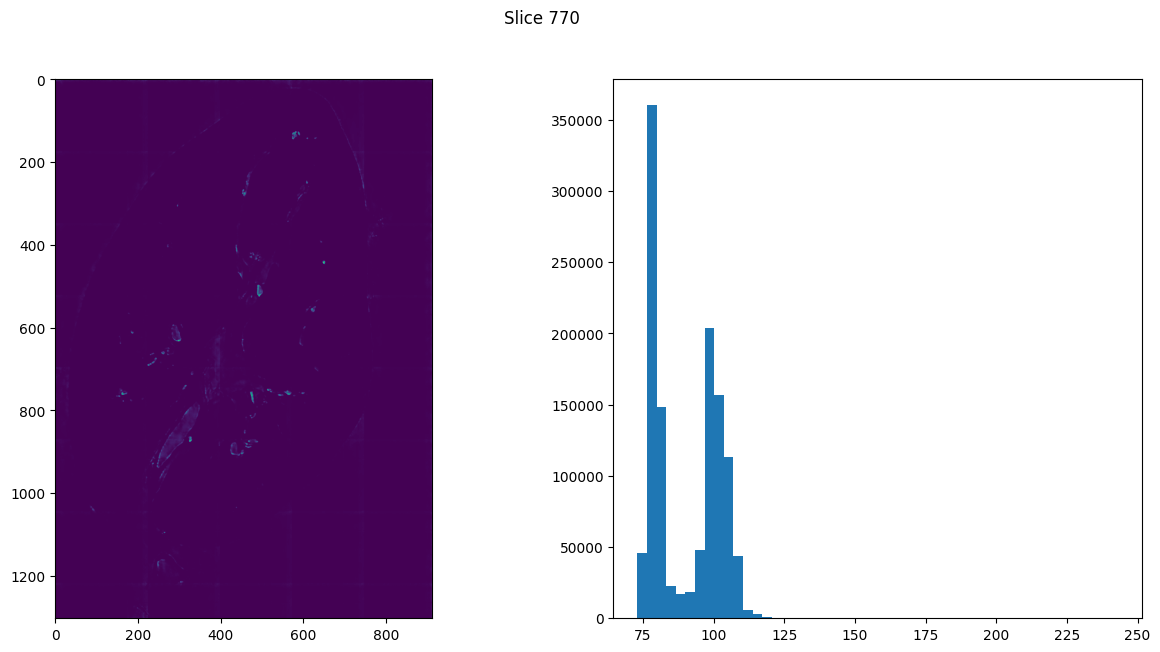

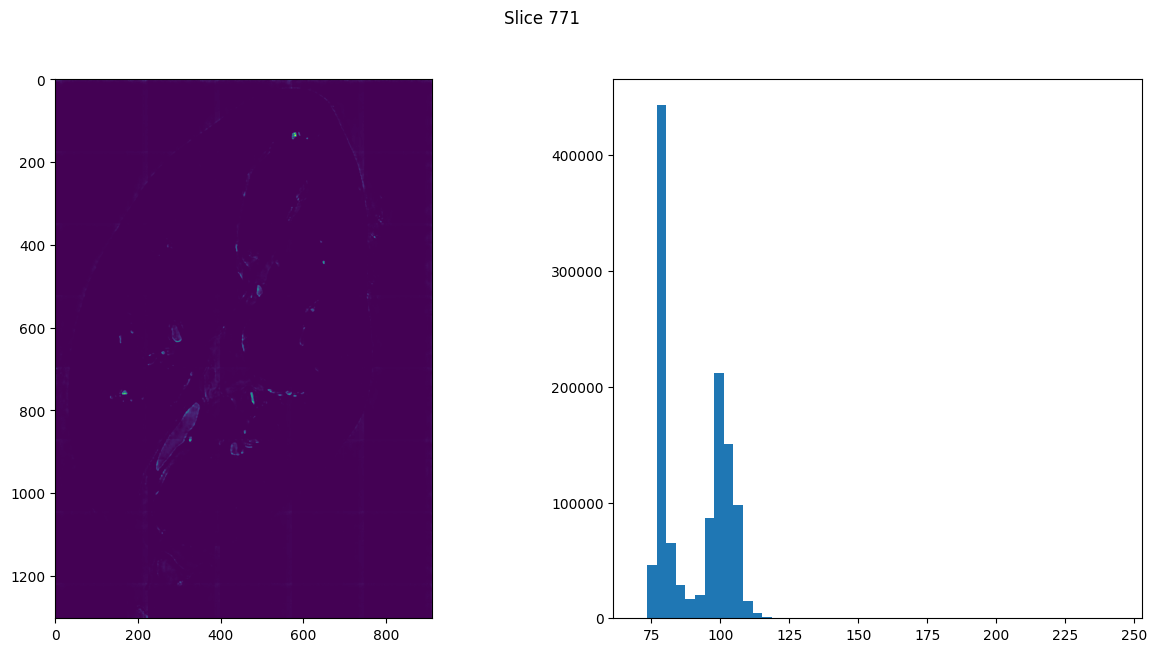

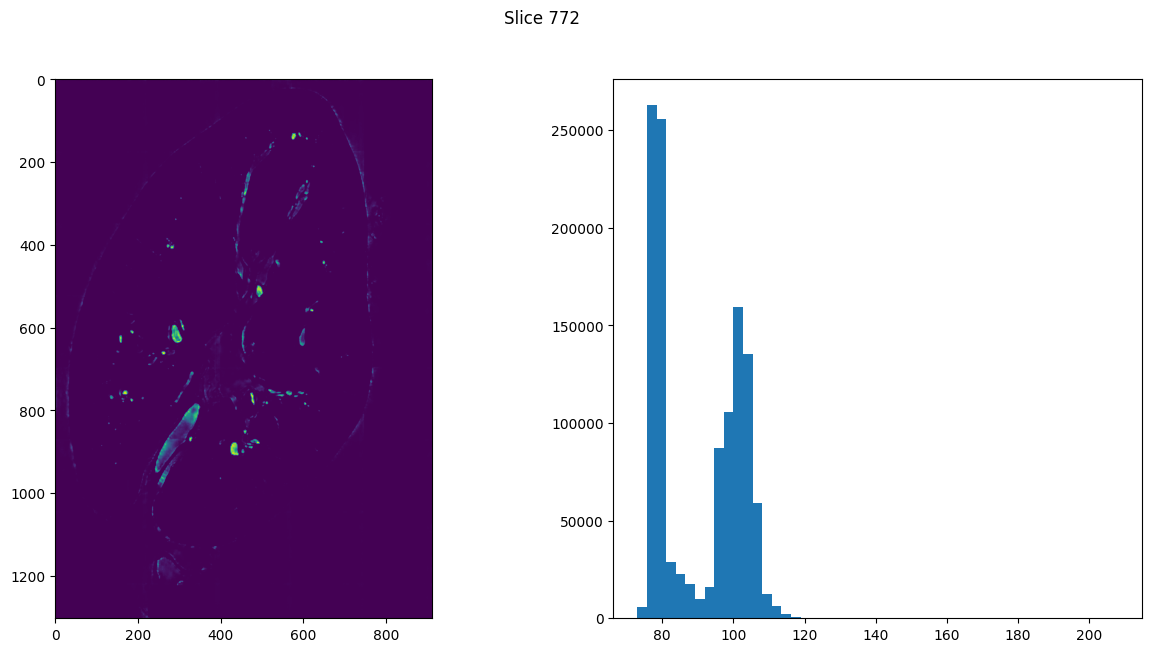

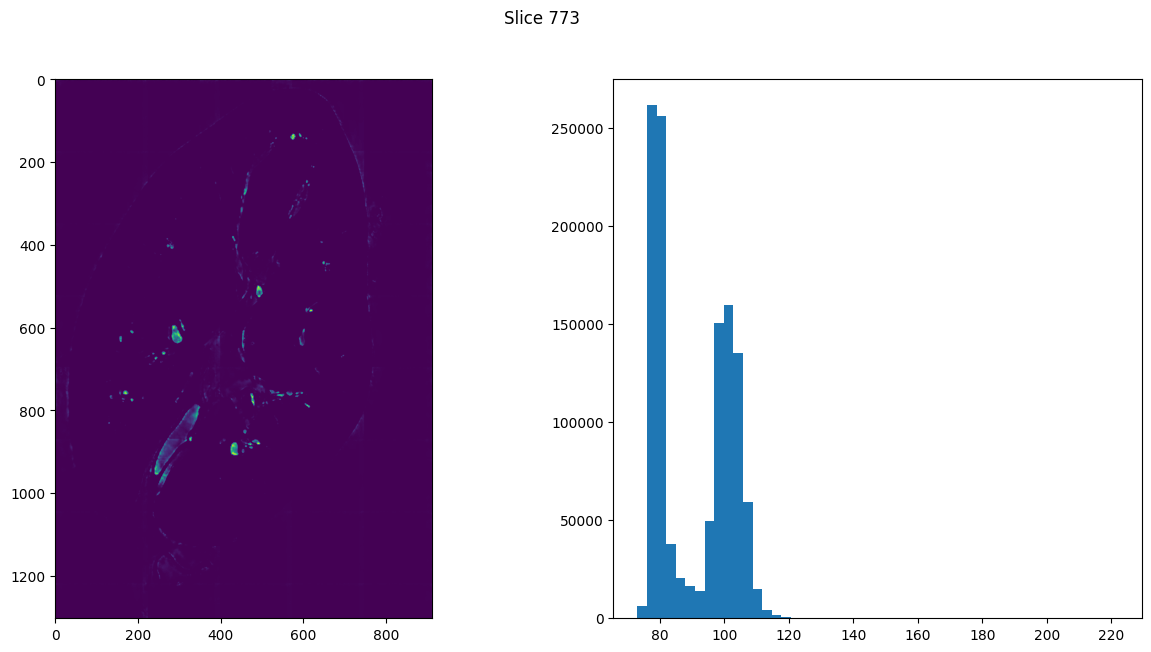

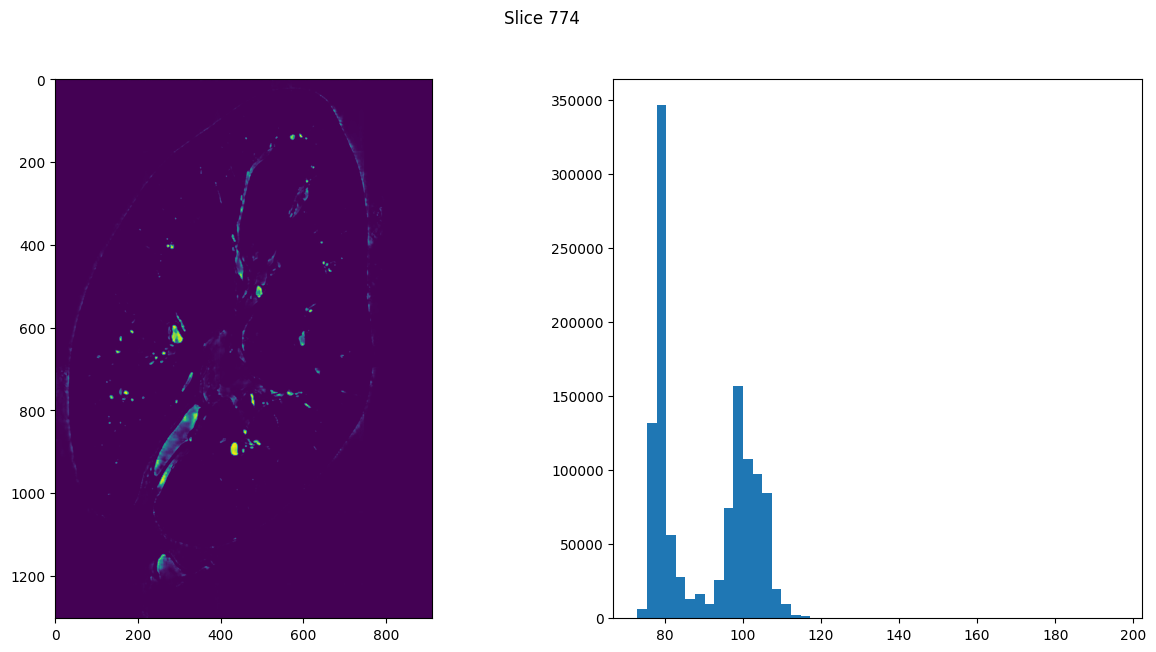

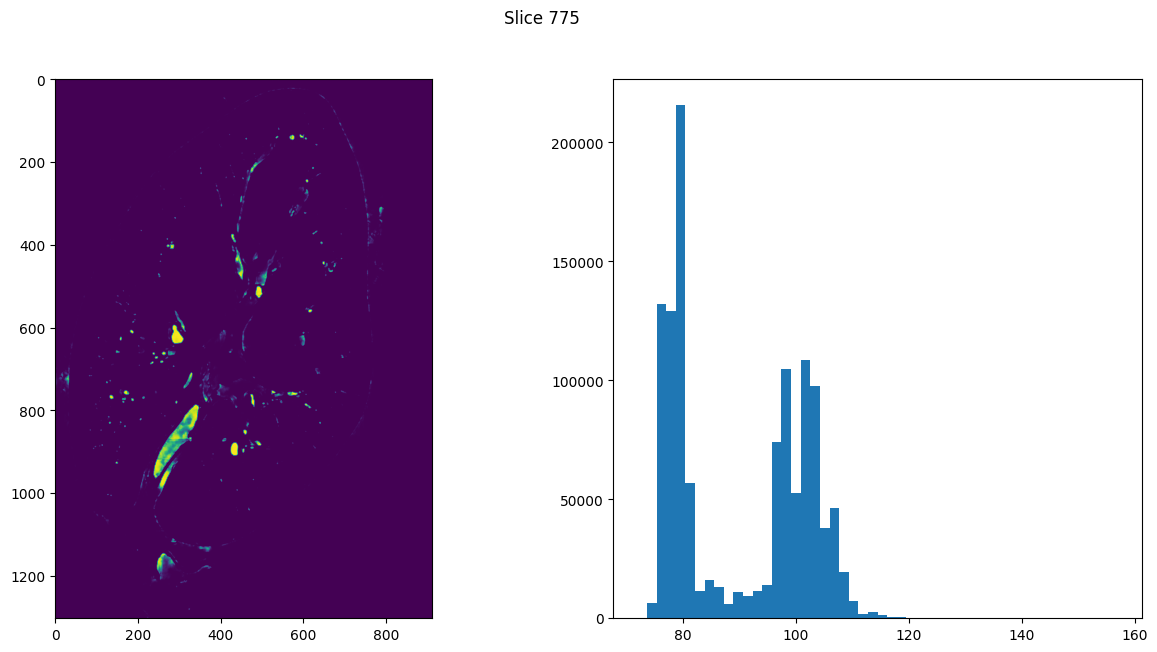

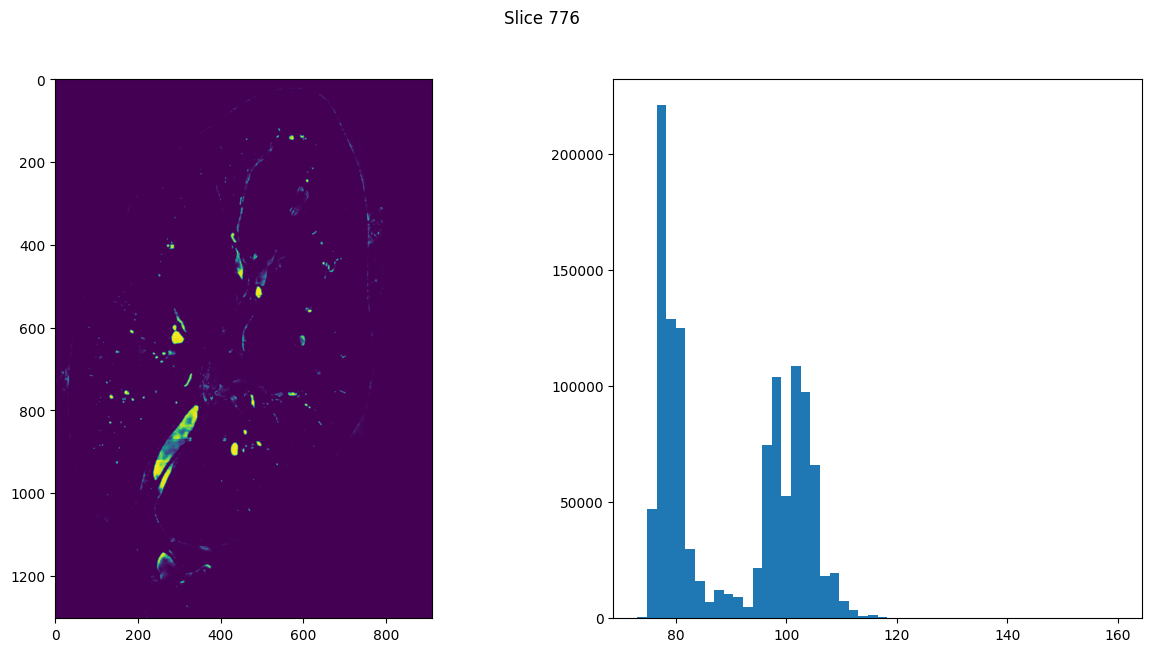

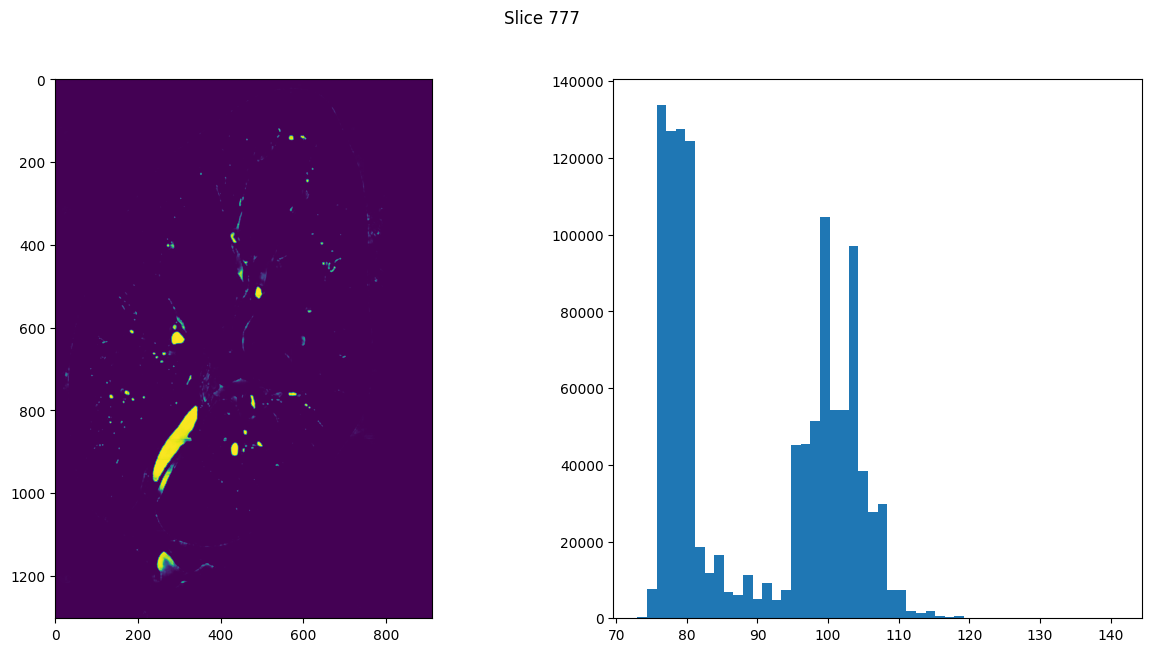

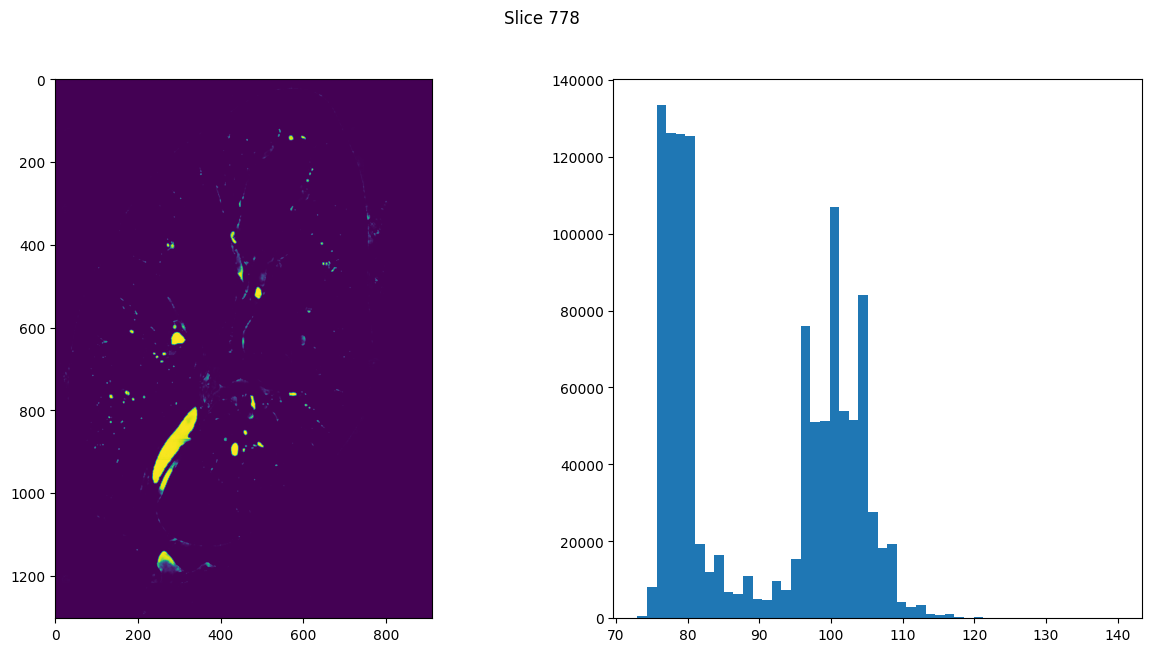

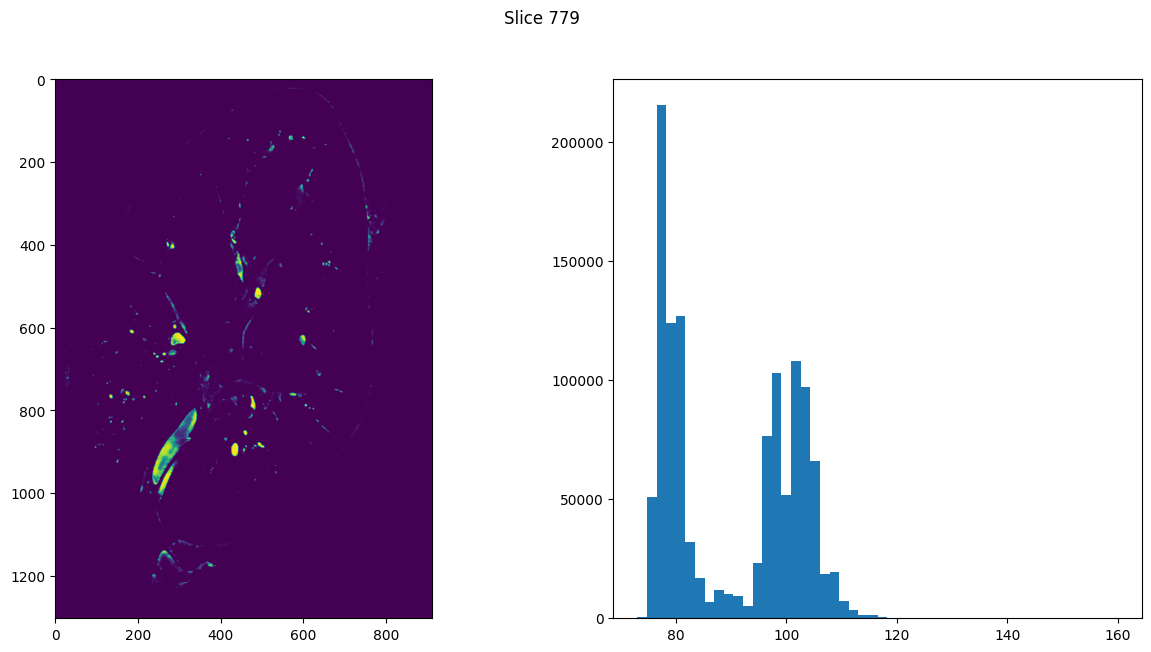

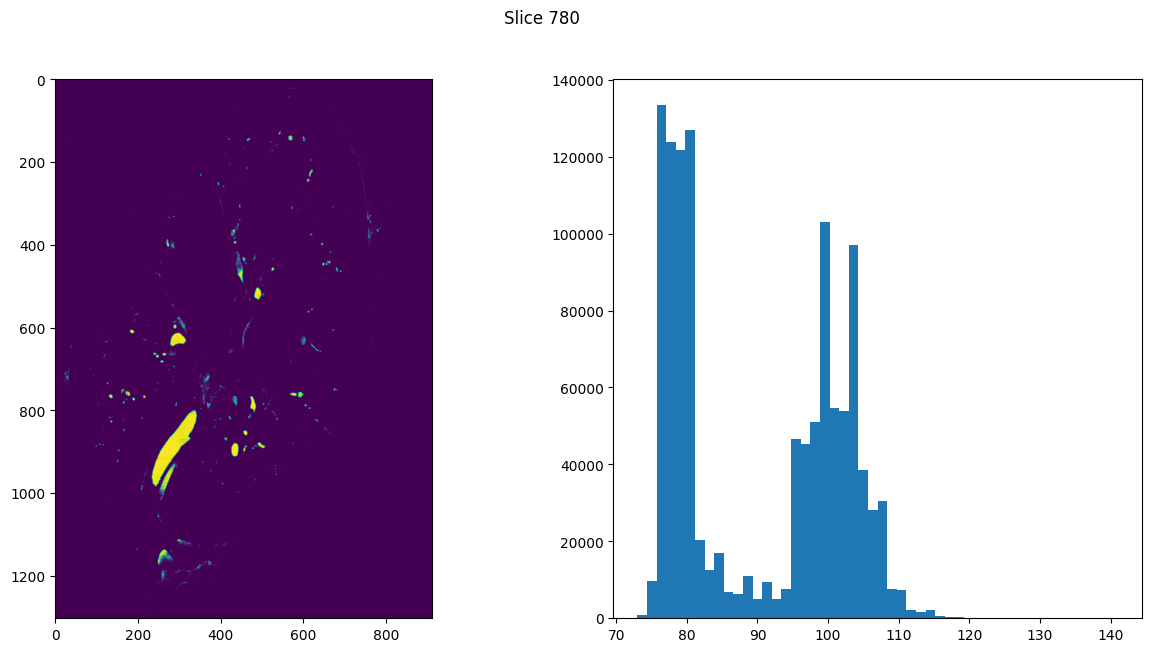

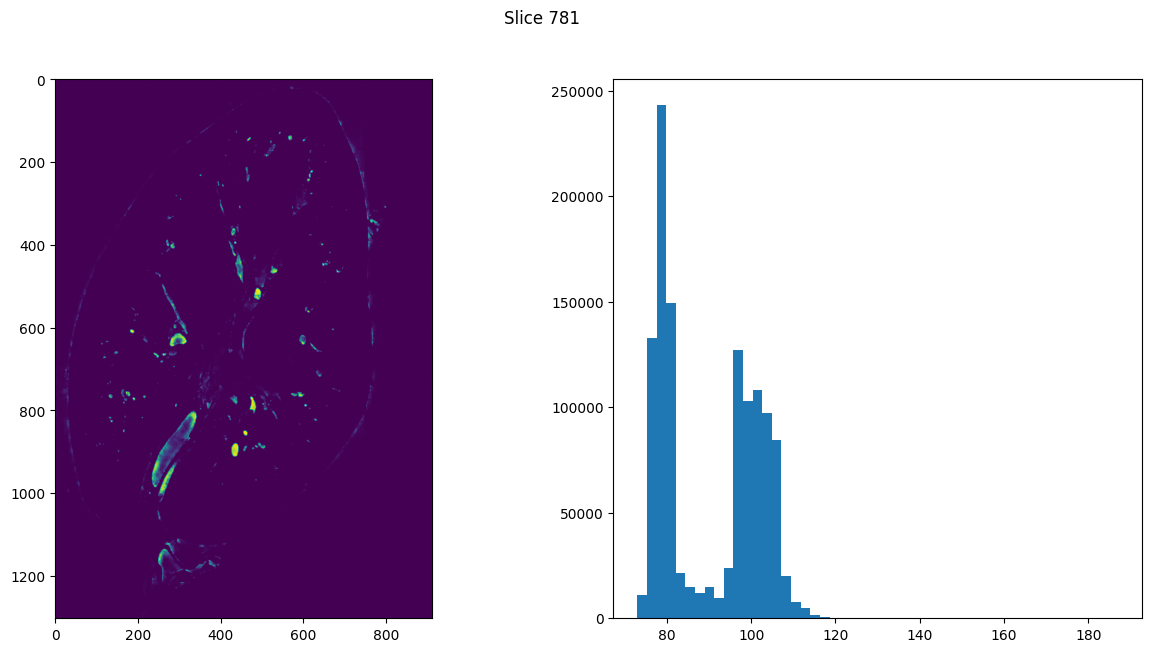

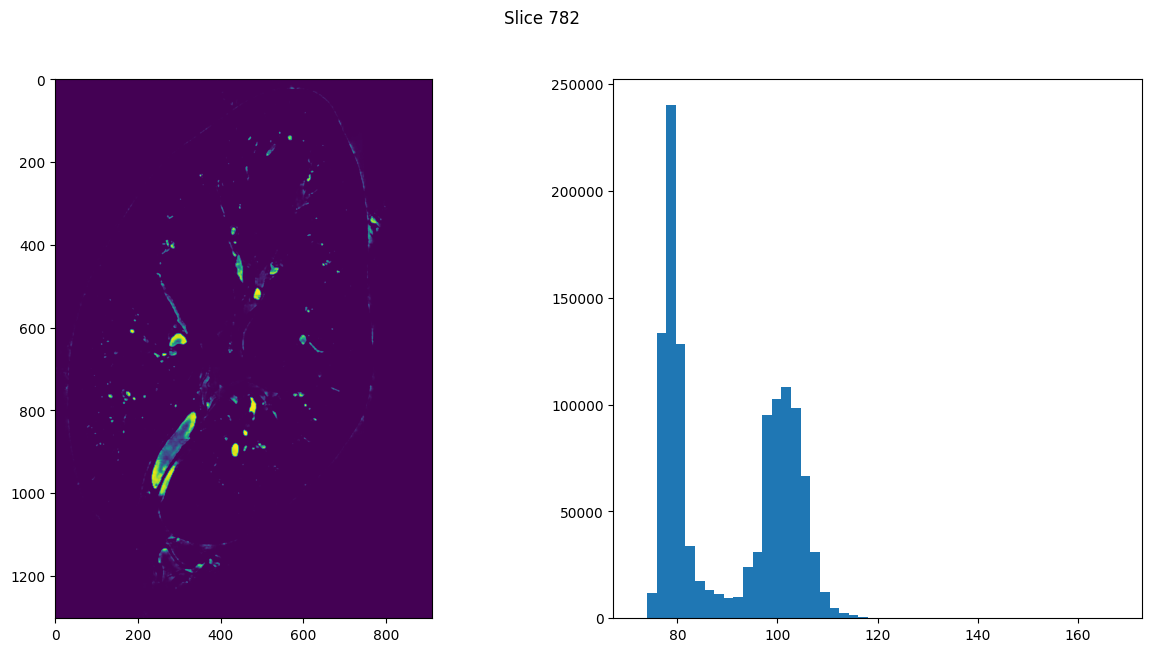

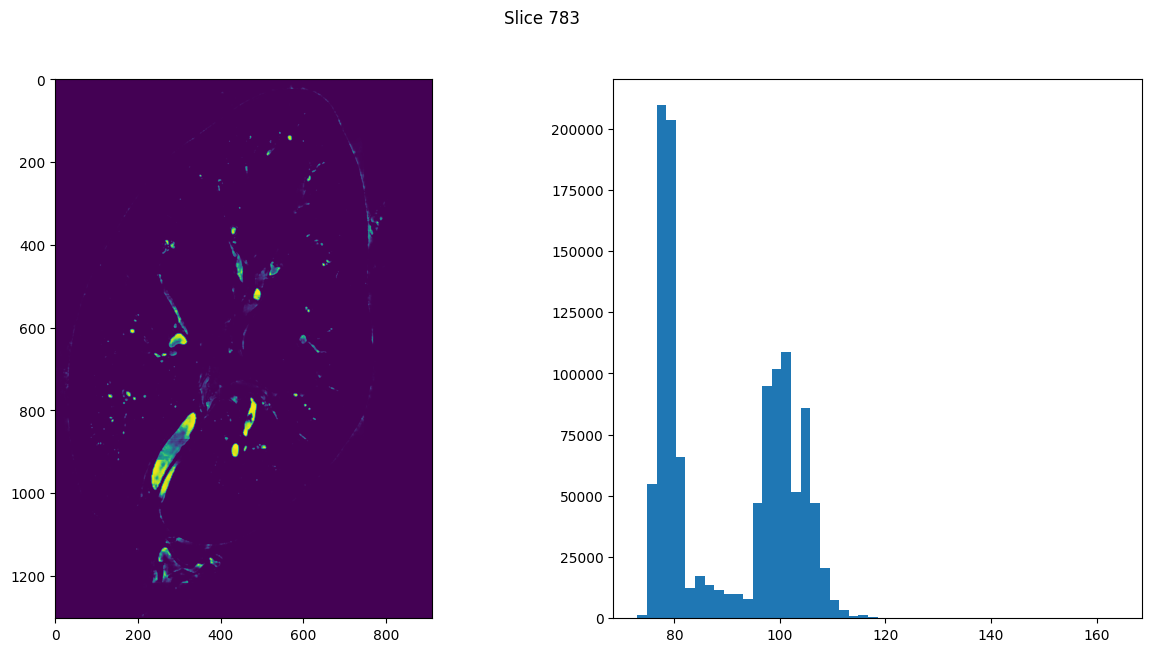

In [29]:
toggle = [0, 0, 0, 1]
idxs = [734 + i for i in range(50)]

for idx in idxs:
    img = torch.from_numpy(cv2.imread(imgs_dir + slices_ids[idx], cv2.IMREAD_GRAYSCALE)).broadcast_to((3, 1303, 912))
    msk = torch.from_numpy(np.array(Image.open(msks_dir + slices_ids[idx])) // 255)
    probs = np.array(Image.open(preds_dir + slices_ids[idx]), dtype=np.float32)
    probs /= probs.max()
    prd = torch.from_numpy(np.where(probs >= 0.5, 1, 0).astype(np.uint8))

    pred_overlay = to_pil_image(draw_segmentation_masks(img, masks=prd.bool(), alpha=1.0, colors=["orange"]))
    mask_overlay = to_pil_image(draw_segmentation_masks(img, masks=msk.bool(), alpha=1.0, colors=["red"]))
    probs_overlay = Image.fromarray((cm.viridis(probs)[:, :, :3] * 225).astype(np.uint8))


    if toggle[0] == 1:
        Image.fromarray(cv2.imread(imgs_dir + slices_ids[idx], cv2.IMREAD_GRAYSCALE)).show()
    if toggle[1] == 1:
        mask_overlay.show()
    if toggle[2] == 1:
        pred_overlay.show()
    if toggle[3] == 1:
        fig, axs = plt.subplots(1, 2, figsize=(15, 7))
        axs[0].imshow(probs)
        axs[1].hist(cv2.imread(imgs_dir + slices_ids[idx], cv2.IMREAD_GRAYSCALE).reshape(-1), 50)
        fig.suptitle(f"Slice {idx}")
        plt.show()



In [30]:
def compare_histograms(ids, int8=False):
    n = len(ids)
    if n > 3:
        _, axs = plt.subplots(n, 1, figsize=(7, 20))
        axs = axs.reshape(-1)
    else:
        _, axs = plt.subplots(1, n, figsize=(15, 5))
    for i in range(n):
        img_path = imgs_dir + slices_ids[ids[i]]
        if int8:
            img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        else:
            img_arr = np.array(Image.open(img_path))
        axs[i].set_title(f"Slice {ids[i]} Histogram")
        axs[i].hist(img_arr.reshape(-1), 50)
    return plt.show()

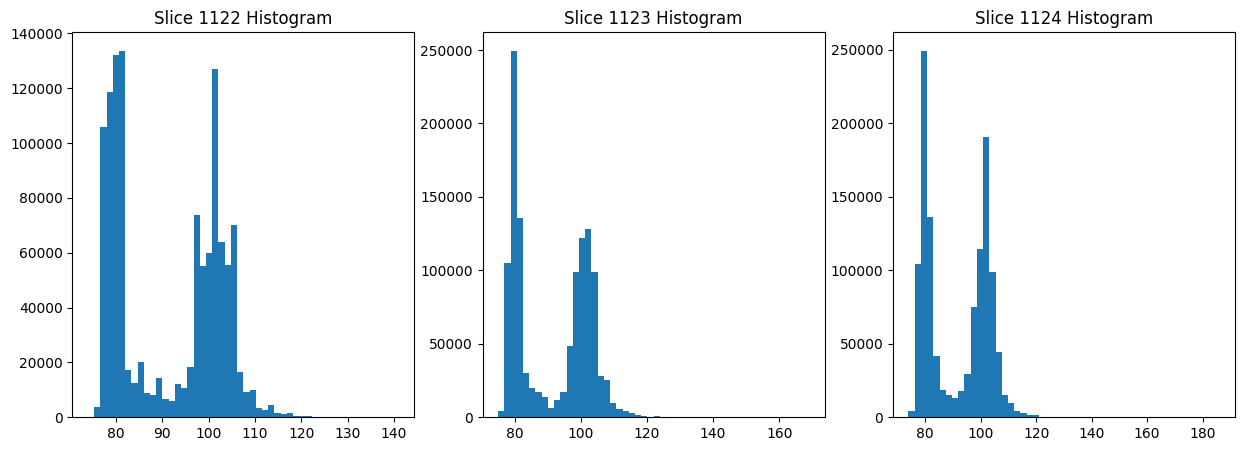

In [31]:
compare_histograms([1122, 1123, 1124], int8=True)

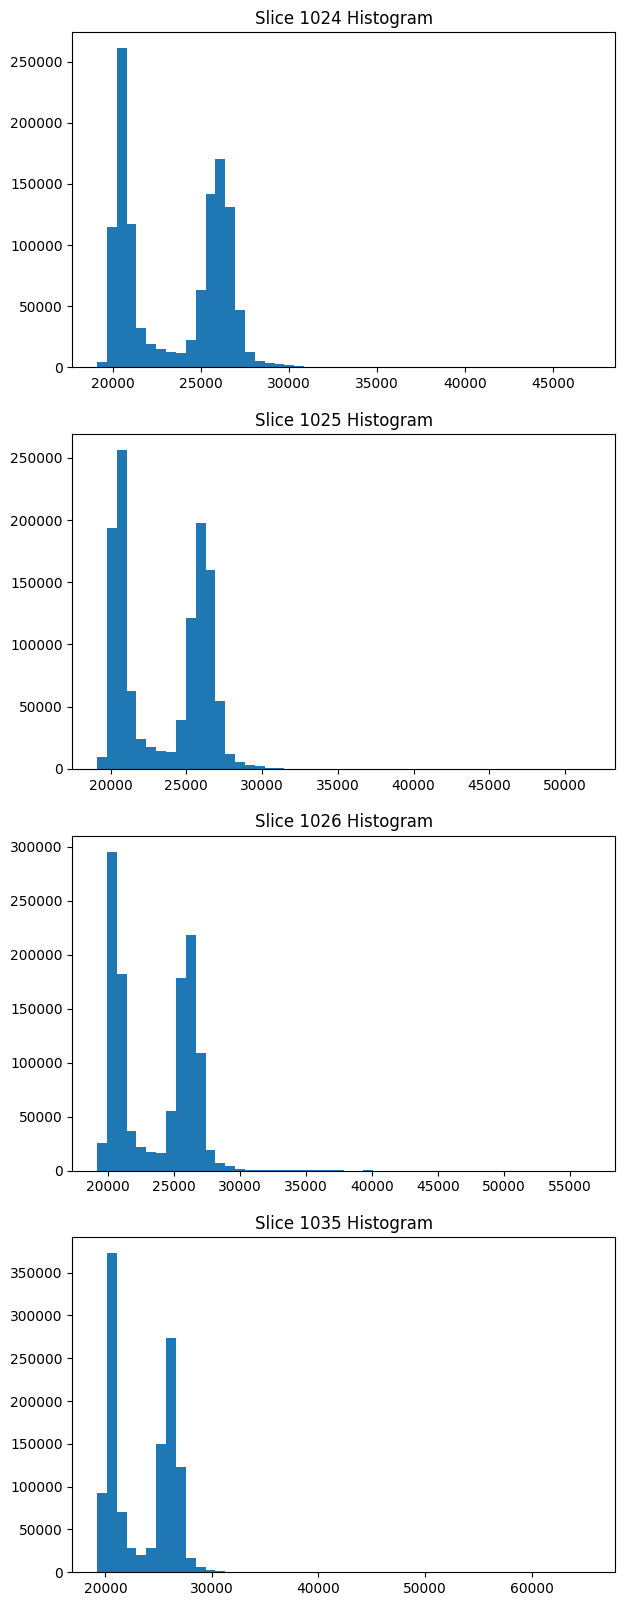

In [32]:
compare_histograms([1024, 1025, 1026, 1035])

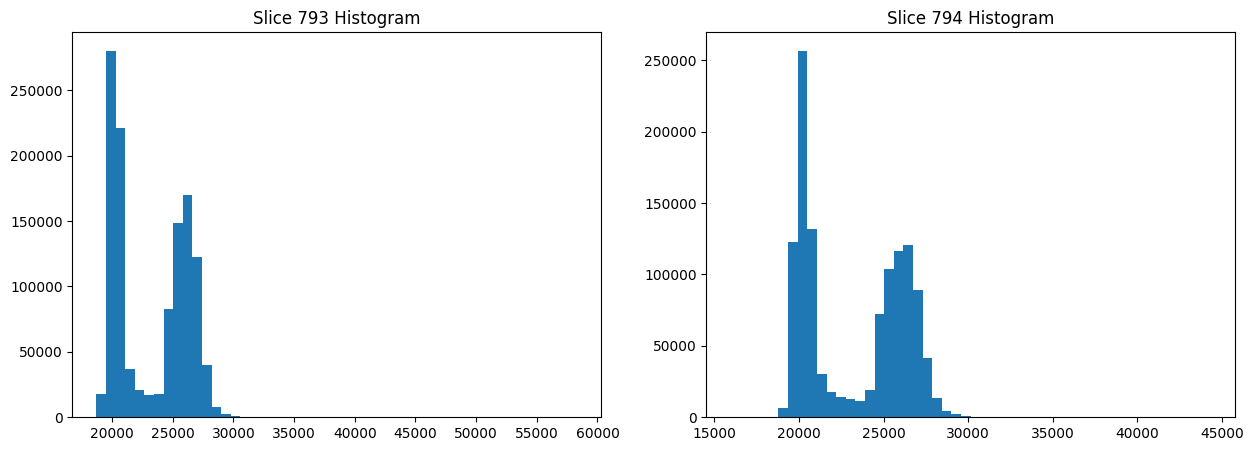

In [33]:
compare_histograms([793, 794])

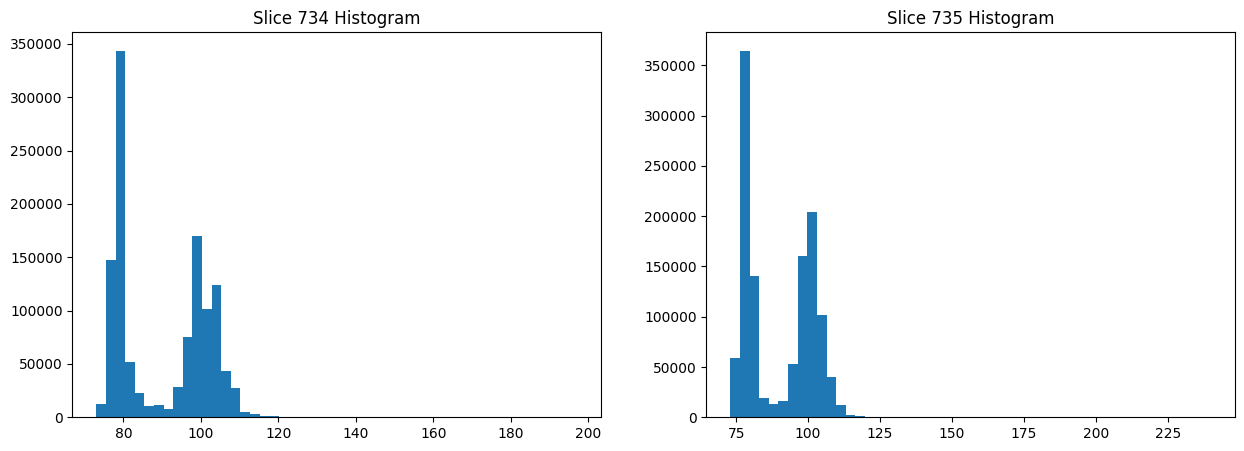

In [34]:
compare_histograms([734, 735], int8=True)

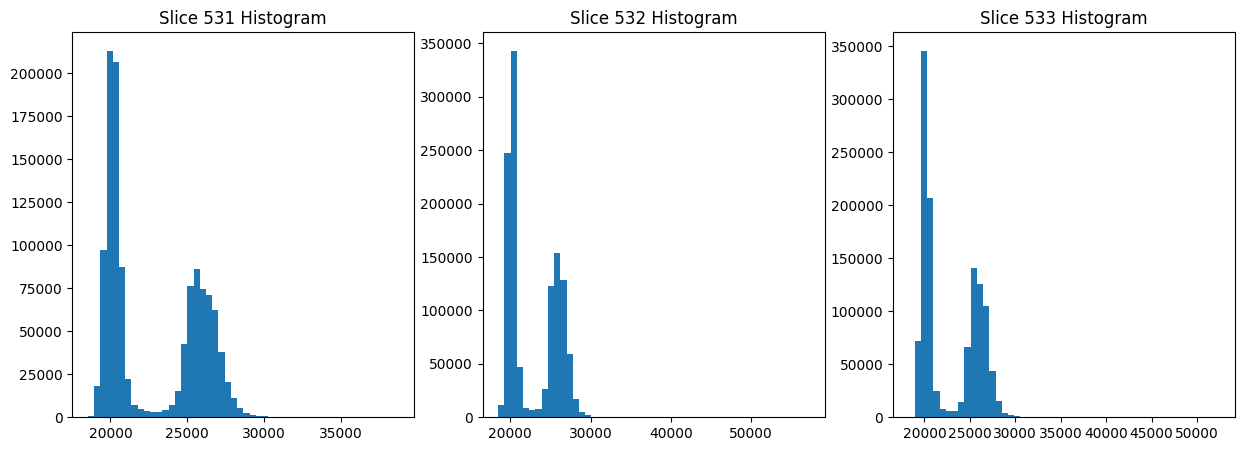

In [35]:
compare_histograms([531, 532, 533])

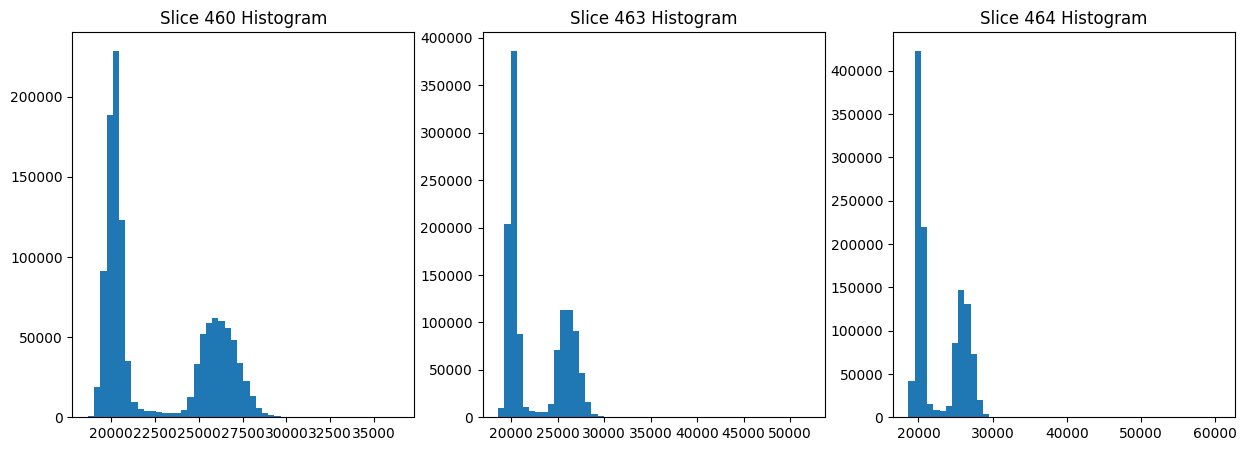

In [36]:
compare_histograms([460, 463, 464])

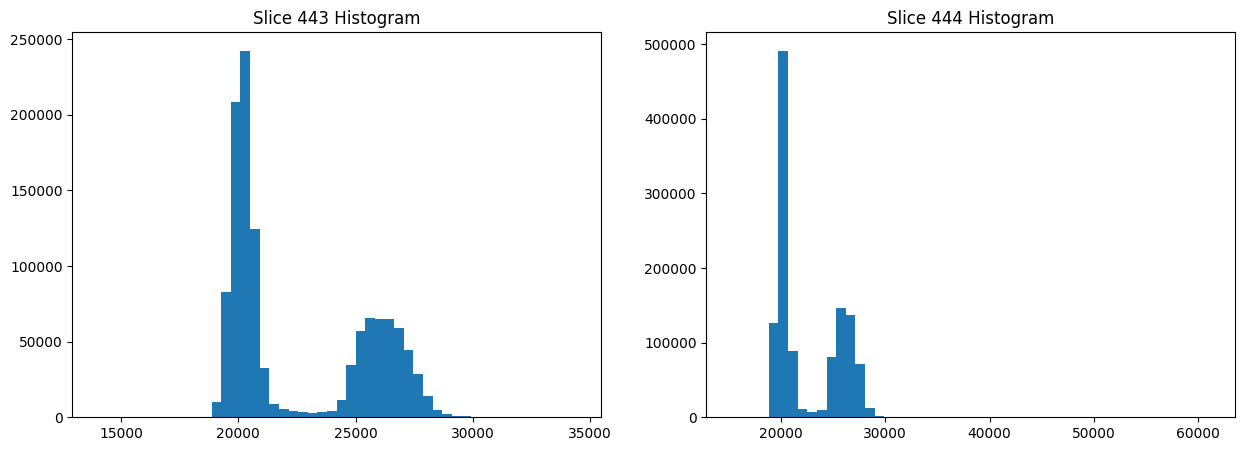

In [37]:
compare_histograms([443, 444])

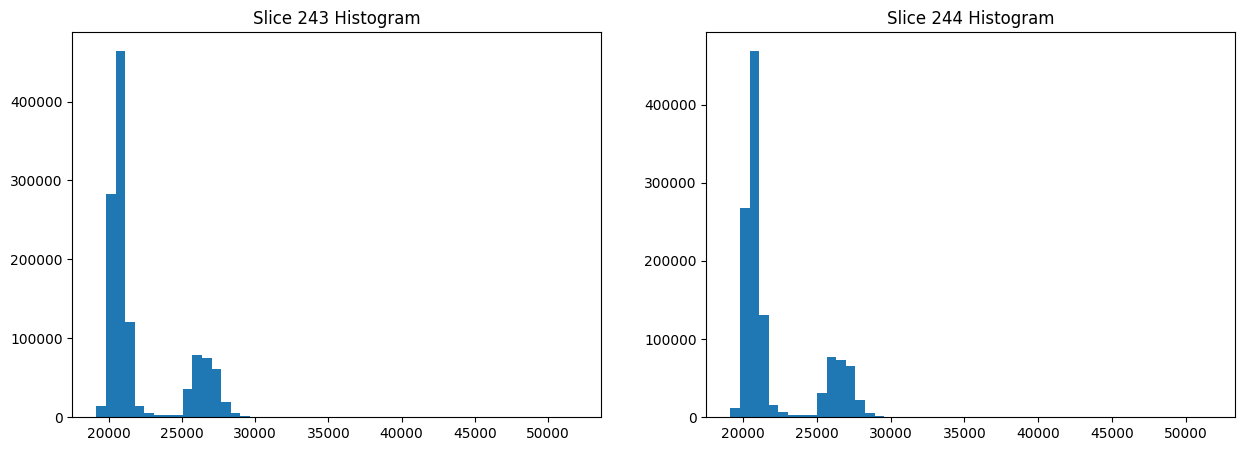

In [38]:
compare_histograms([243, 244])

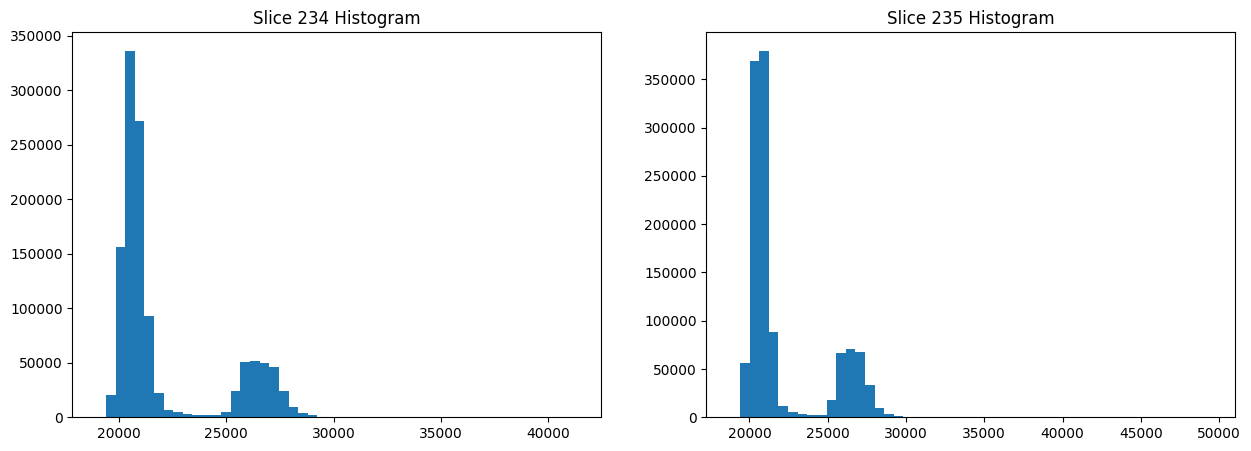

In [39]:
compare_histograms([234, 235])

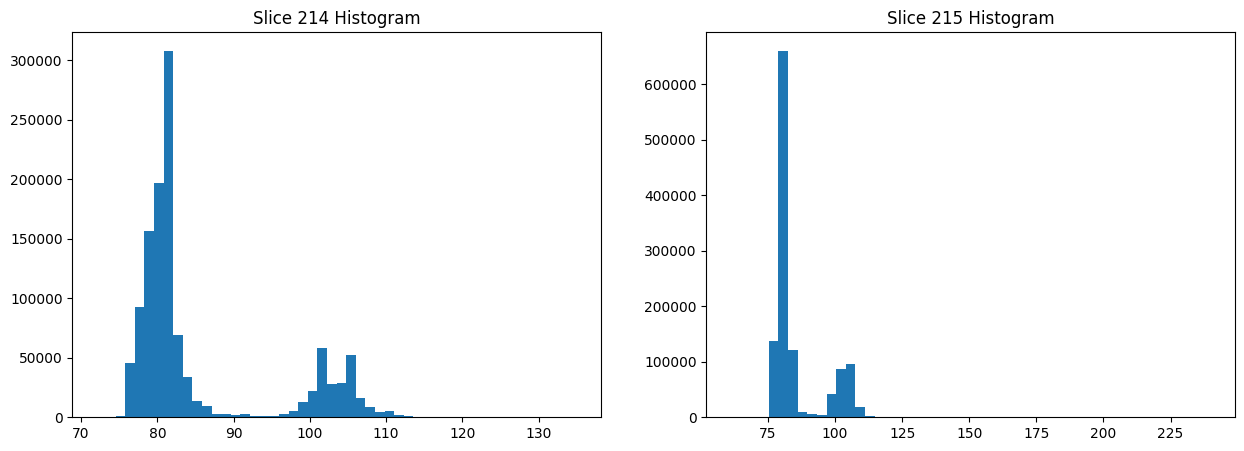

In [40]:
compare_histograms([214, 215], int8=True)

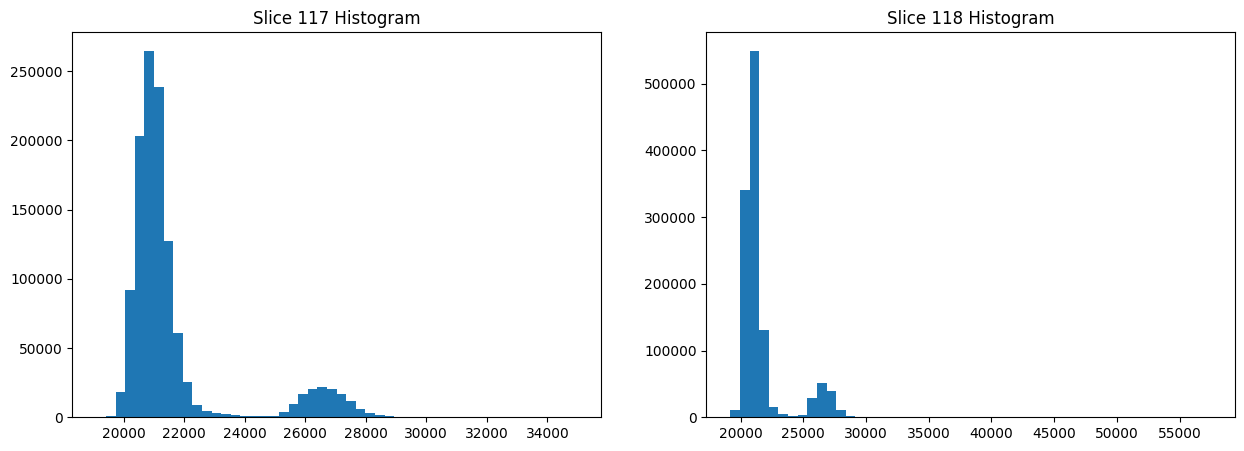

In [41]:
compare_histograms([117, 118])

In [42]:
def display_only_outliers(id, img_path=None, th=130):
    path = imgs_dir + slices_ids[id] if img_path is None else img_path 
    return Image.fromarray(np.where(cv2.imread(path, cv2.IMREAD_GRAYSCALE) > th, 255, 0).astype(np.uint8))


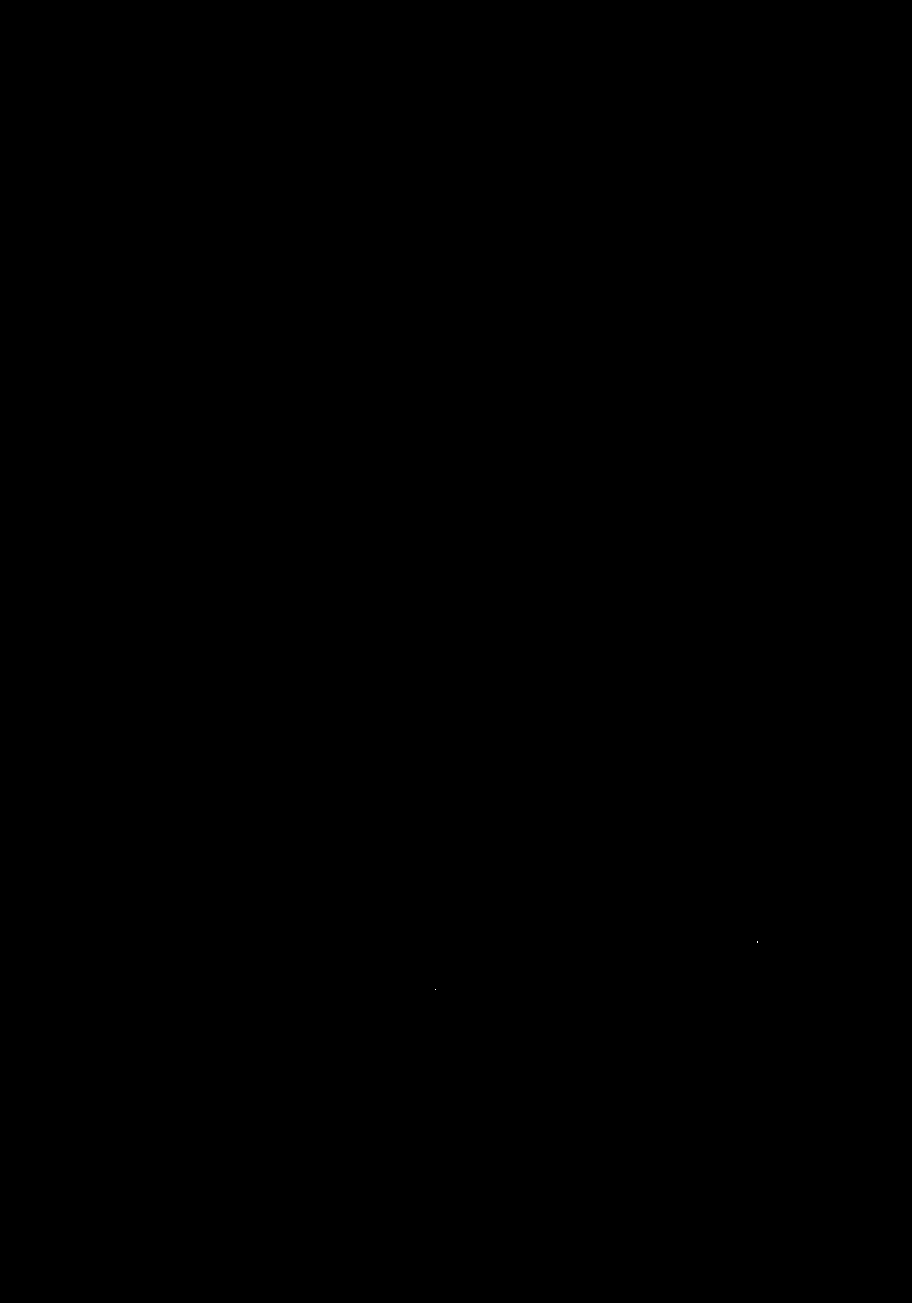

In [43]:
display_only_outliers(1421)

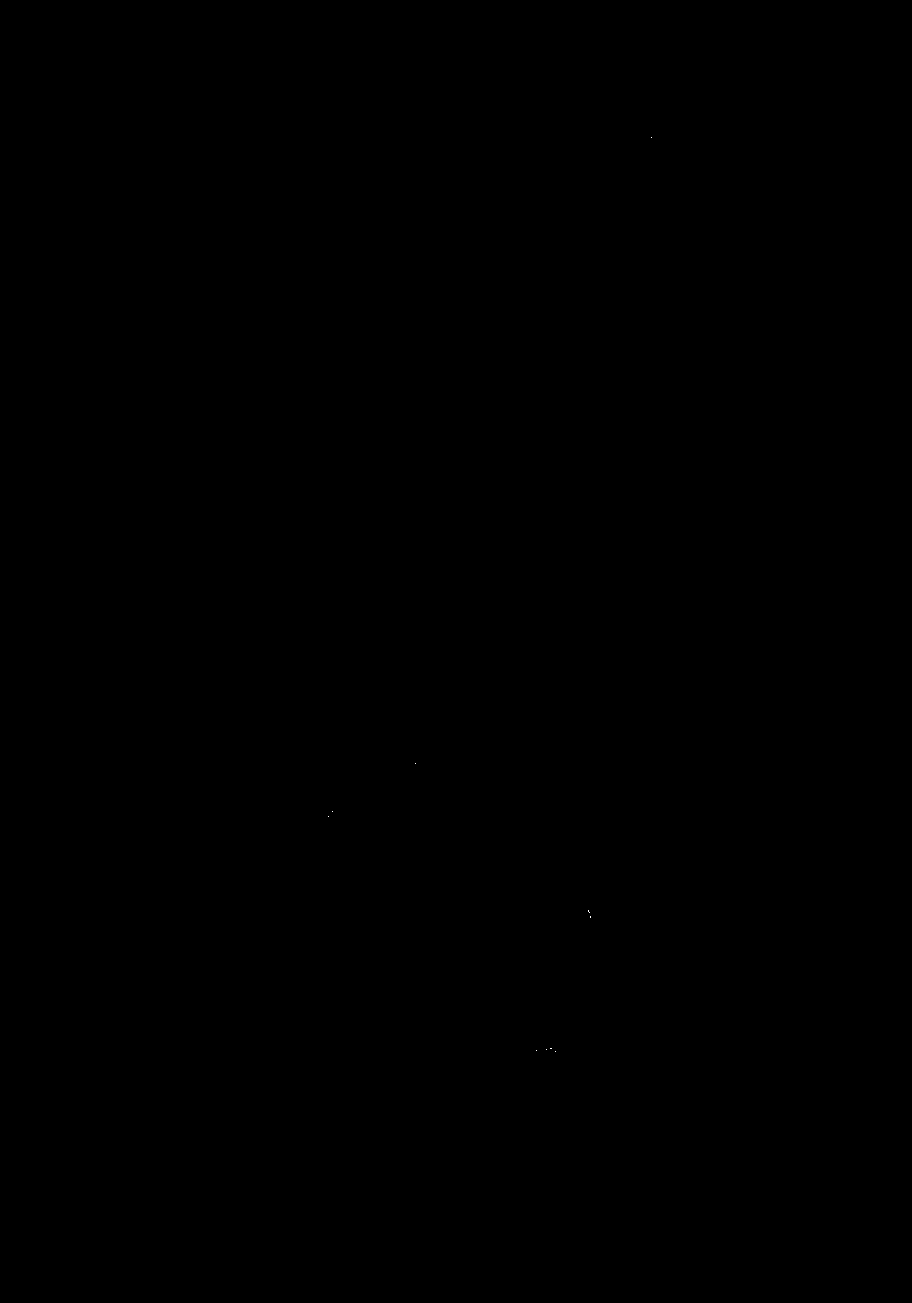

In [44]:
display_only_outliers(1354)

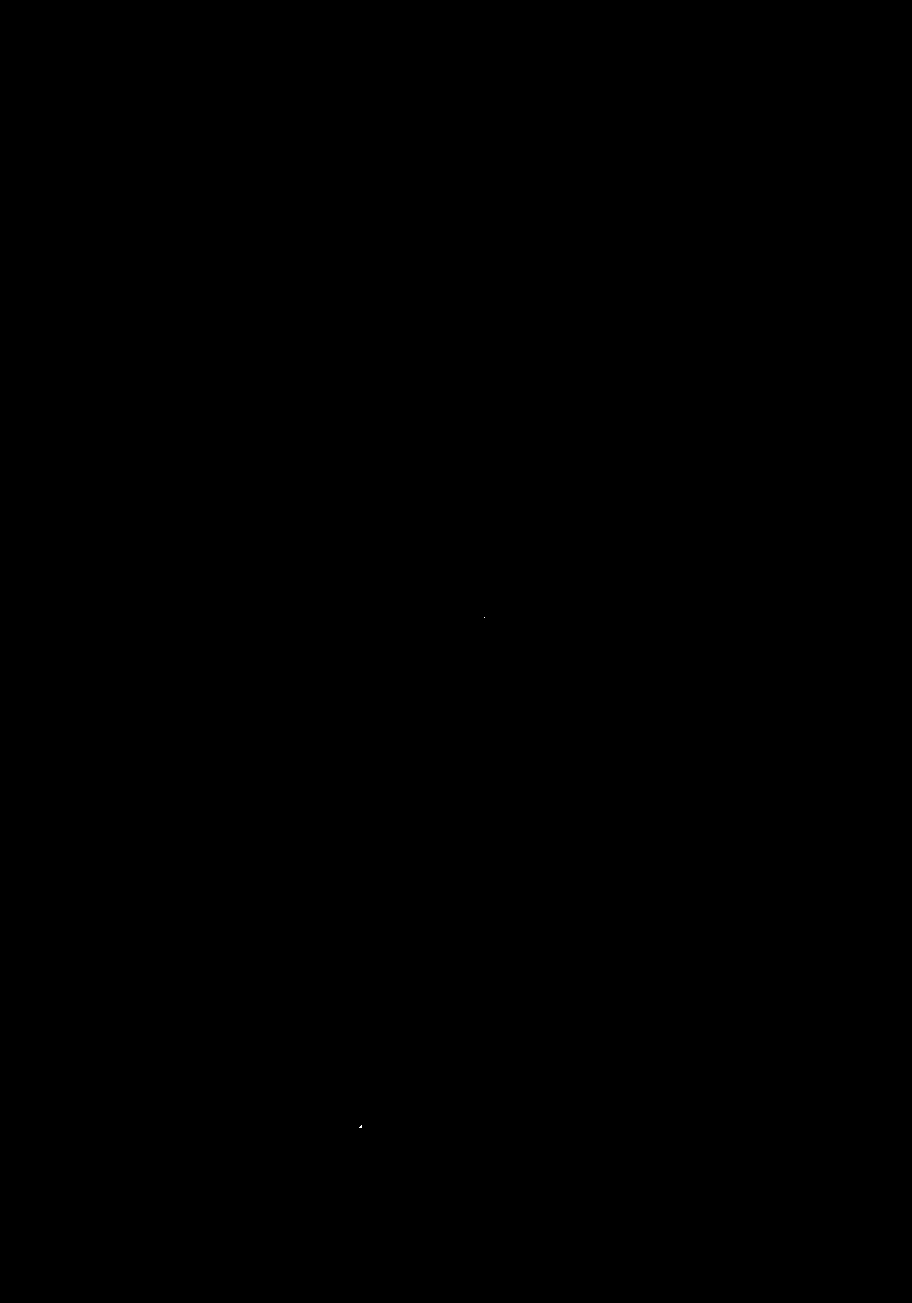

In [45]:
display_only_outliers(793)

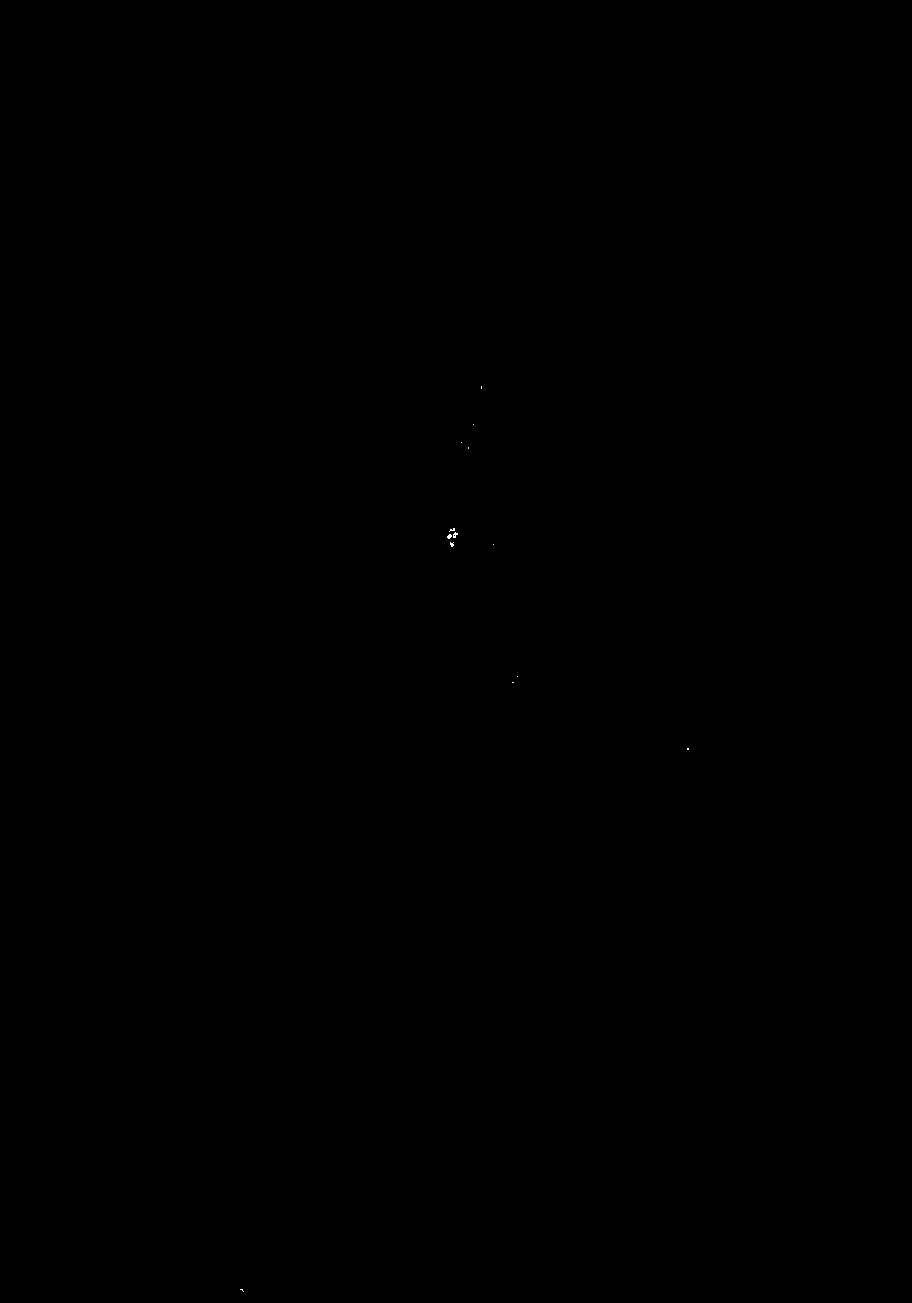

In [46]:
display_only_outliers(735)

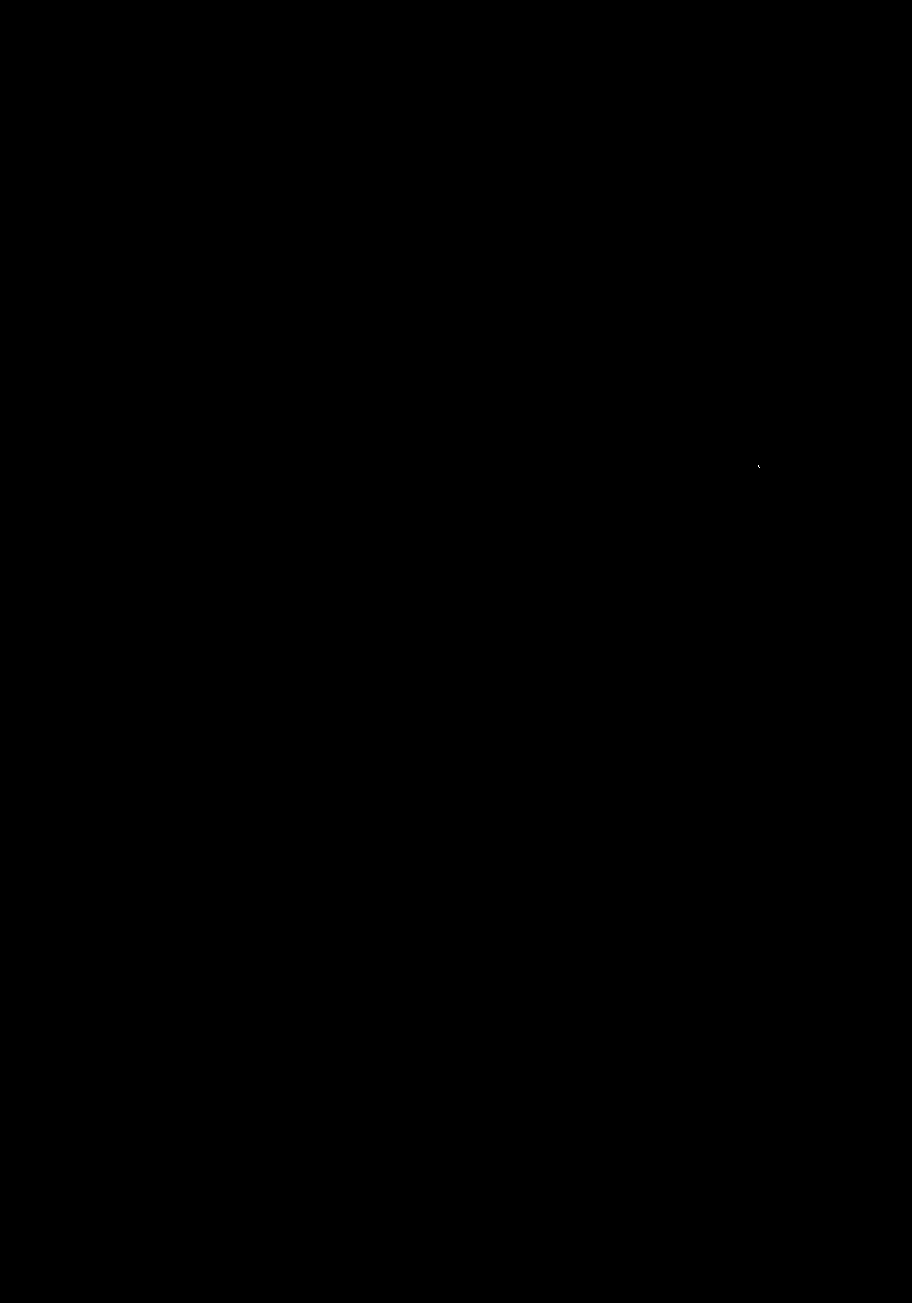

In [47]:
display_only_outliers(218)

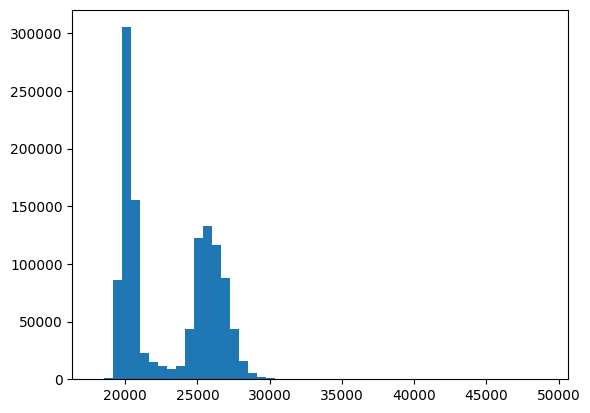

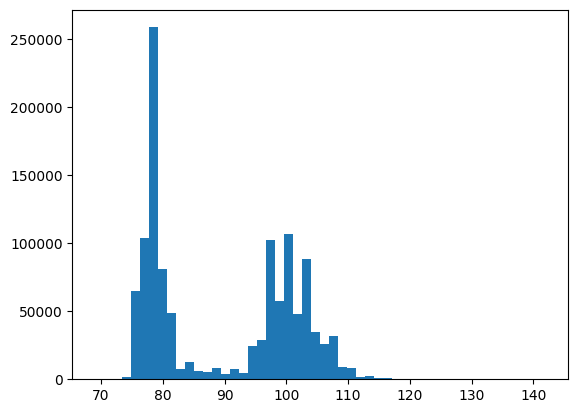

In [48]:
img = Image.open(imgs_dir + slices_ids[717])
img_edit = Image.open("0717.tif")

plt.hist(np.array(img).reshape(-1), 50)
plt.show()
plt.hist(cv2.imread("0717.tif", cv2.IMREAD_GRAYSCALE).reshape(-1), 50);
plt.show()
display_only_outliers(0, img_path="0717.tif").show()